# **Project Name : ✨ House Price Prediction  ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Import Libraries**

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


#Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#from sklearn.metrics._plot.roc_curve import auc

# **Load Dataset**

In [50]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [51]:
df.shape

(21613, 21)

In [52]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [54]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [55]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# **Univariate Analysis**

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


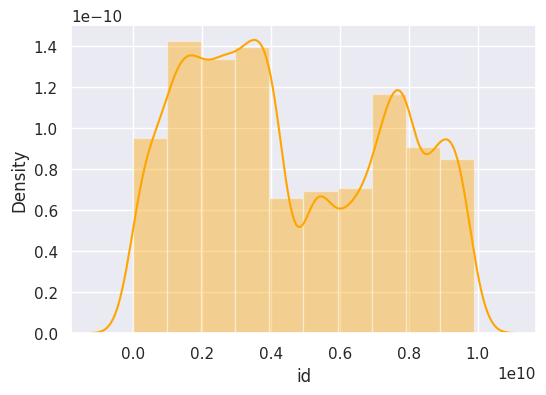

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


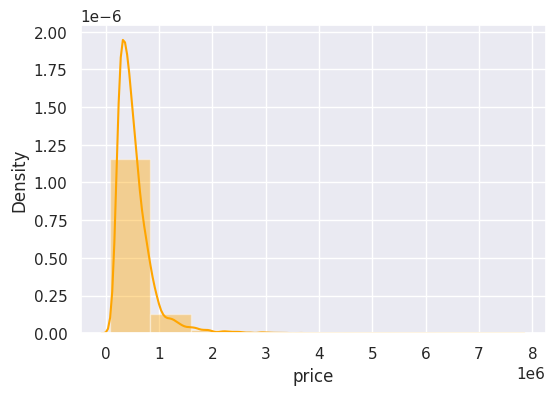

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


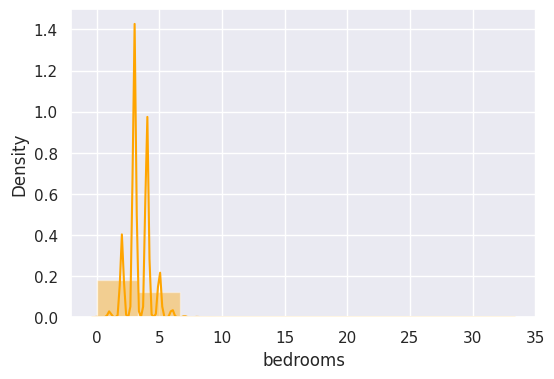

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


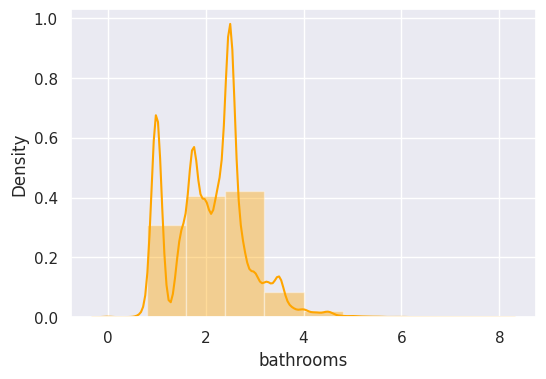

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


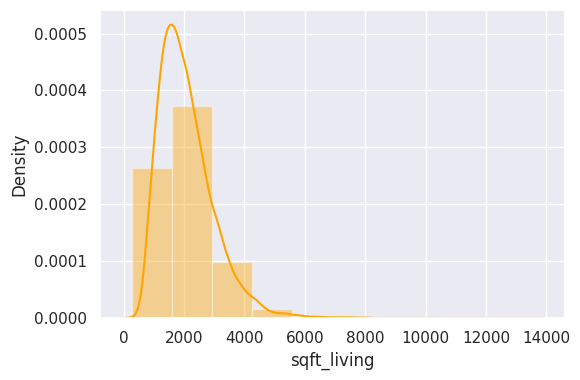

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


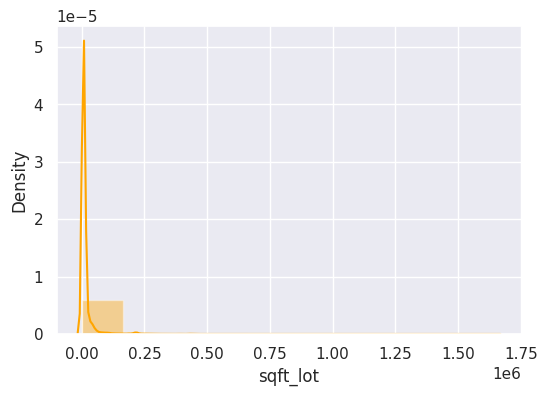

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


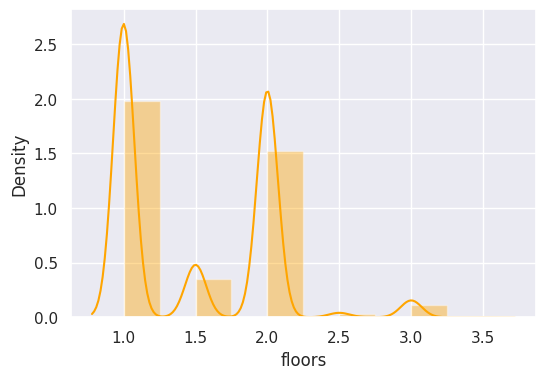

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


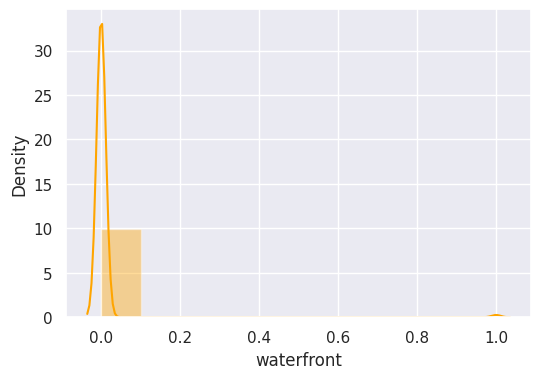

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


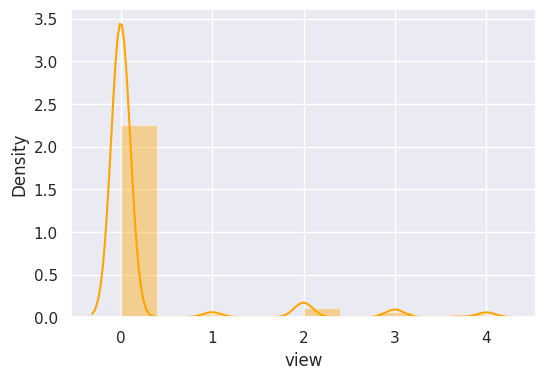

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


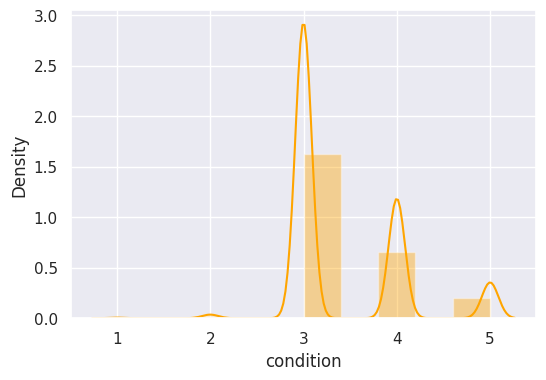

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


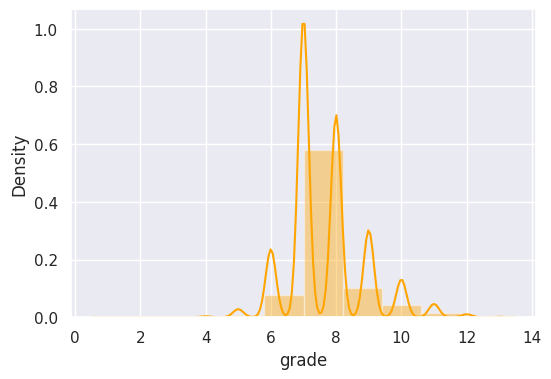

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


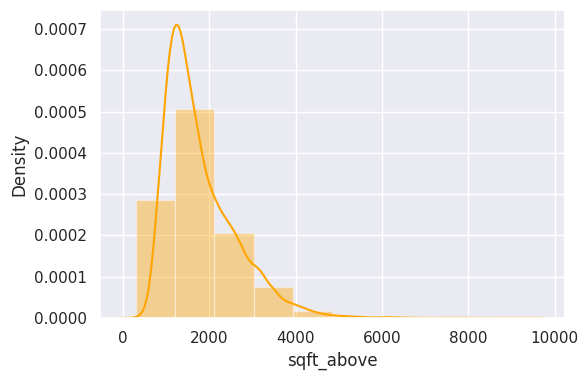

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


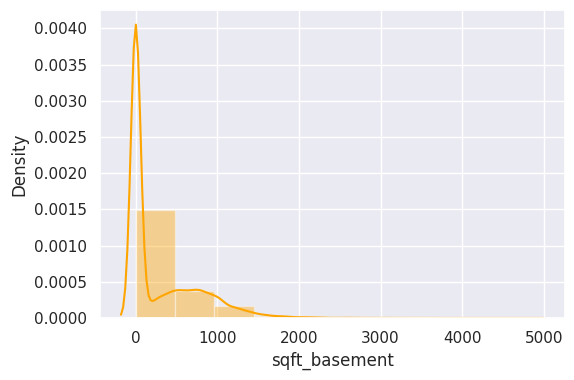

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


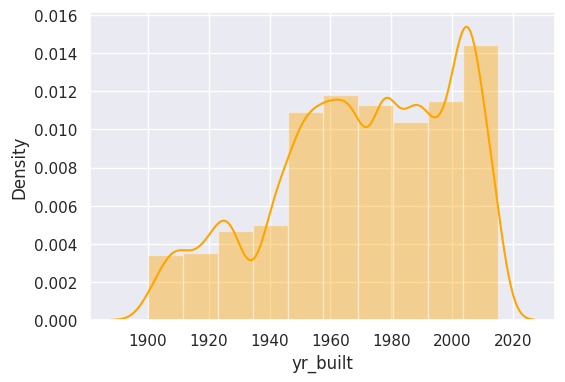

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


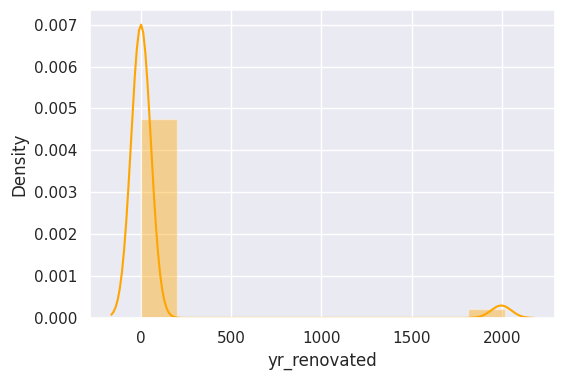

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


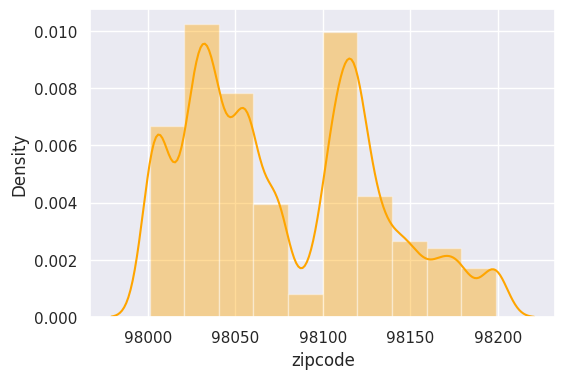

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


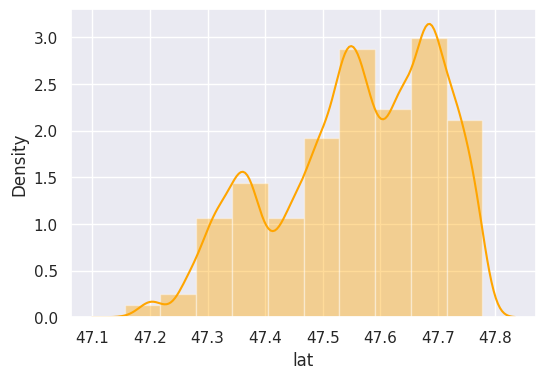

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


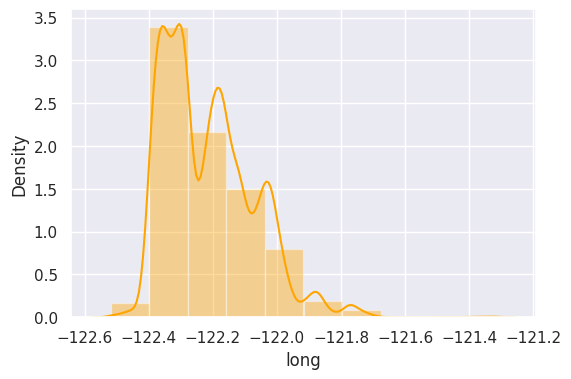

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


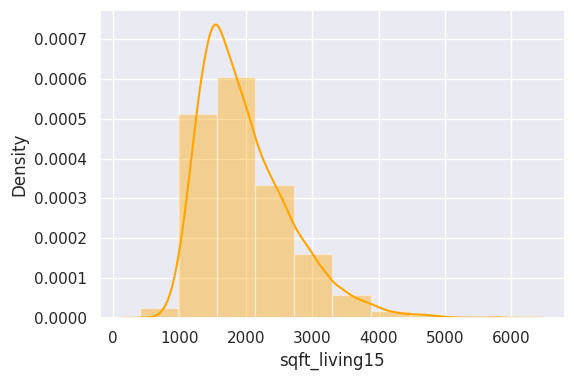

<ipython-input-56-8f96fcd289d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=True, color="orange", bins=10)


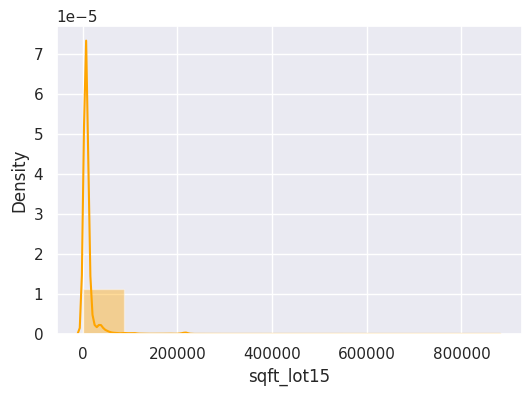

In [56]:
num_cols = df.select_dtypes(include=["int64","float64"])

for i in num_cols.columns:
  sns.set(rc={"figure.figsize":(6,4)})
  sns.distplot(df[i], kde=True, color="orange", bins=10)
  plt.show()

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [57]:
df.duplicated().sum()

0

#### **Remove Outliers**

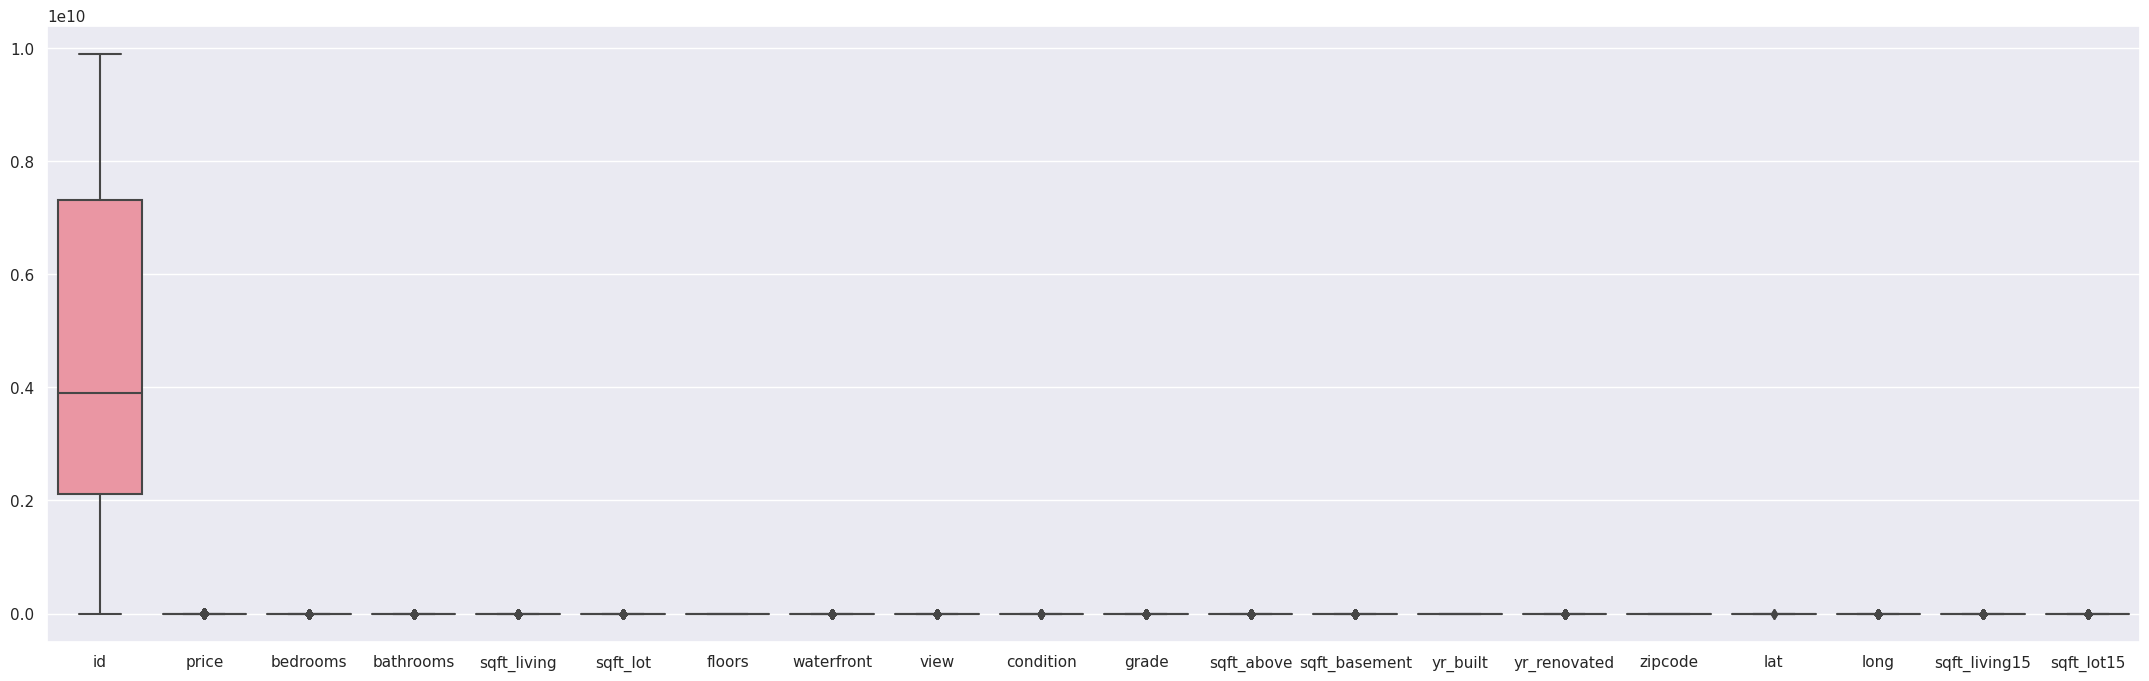

In [58]:
plt.figure(figsize=(27,8))
sns.boxplot(num_cols)
plt.show()

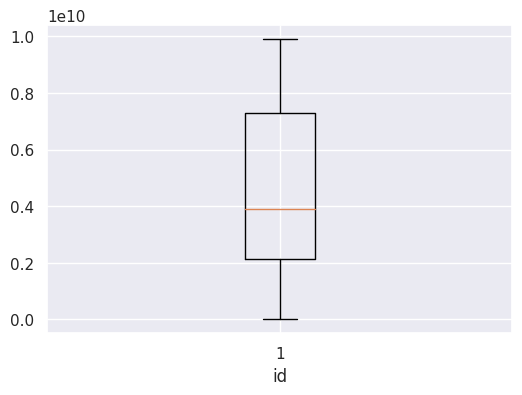

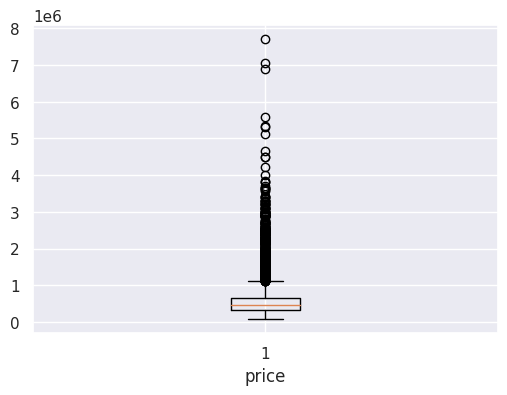

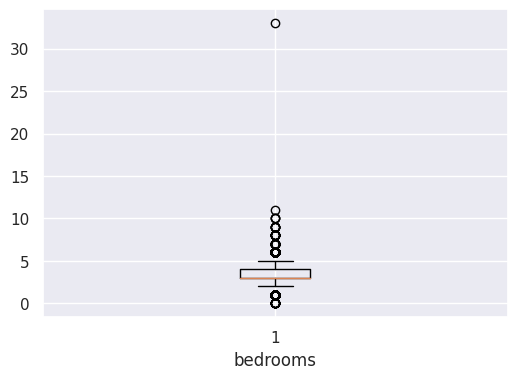

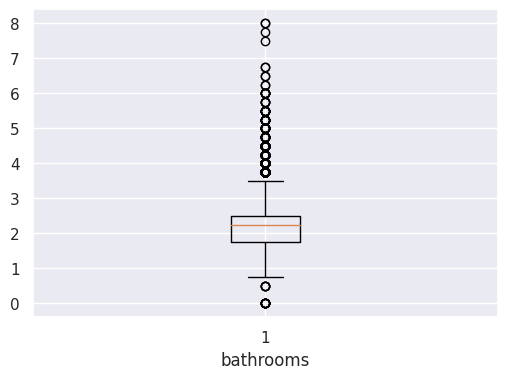

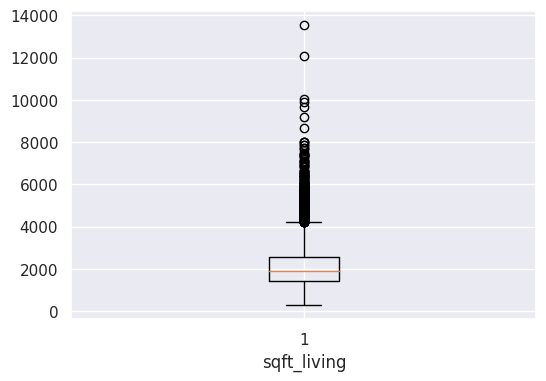

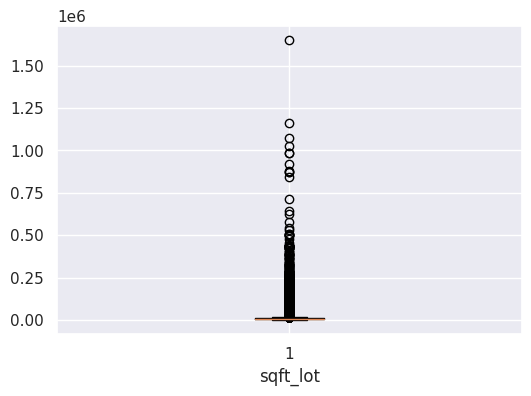

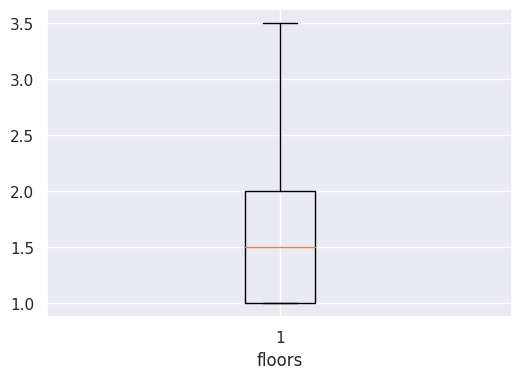

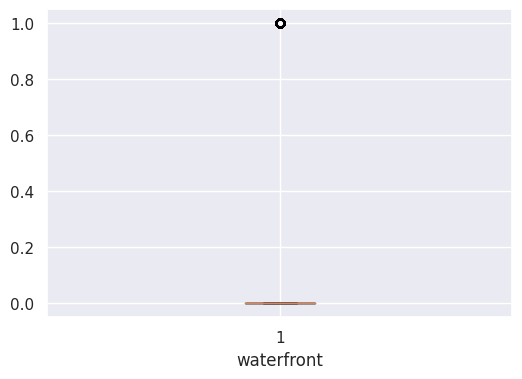

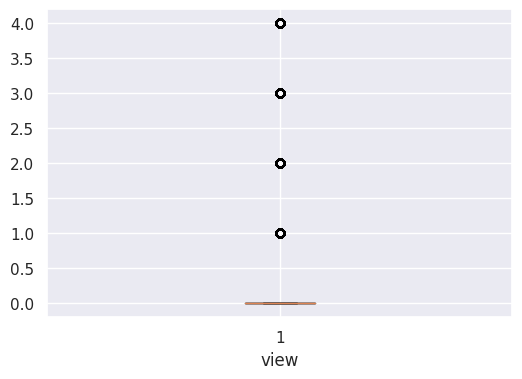

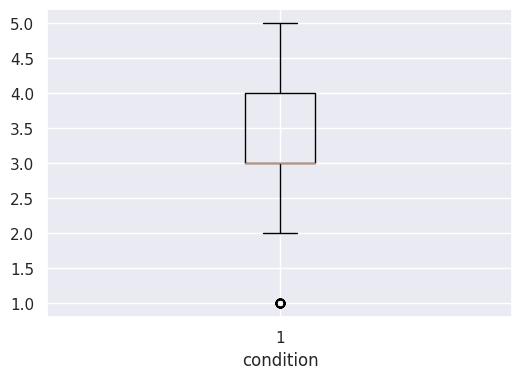

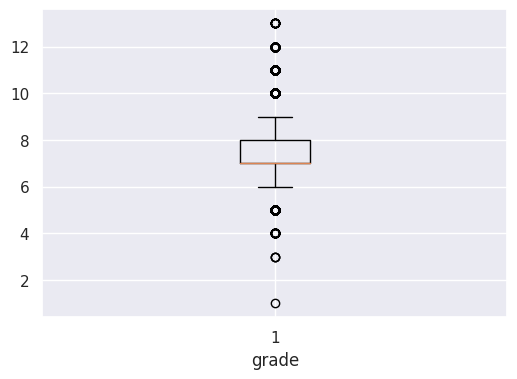

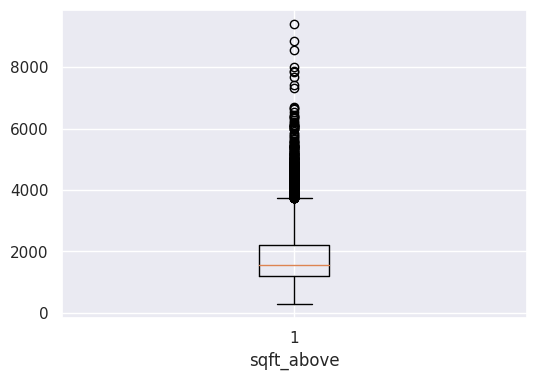

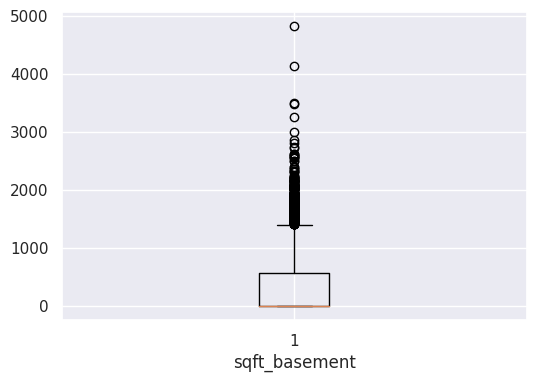

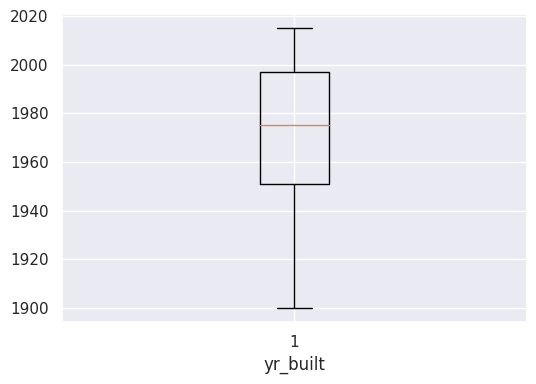

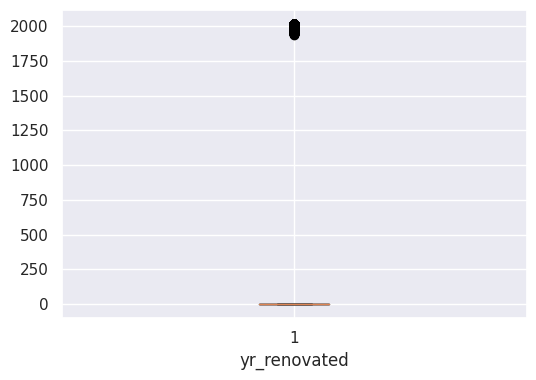

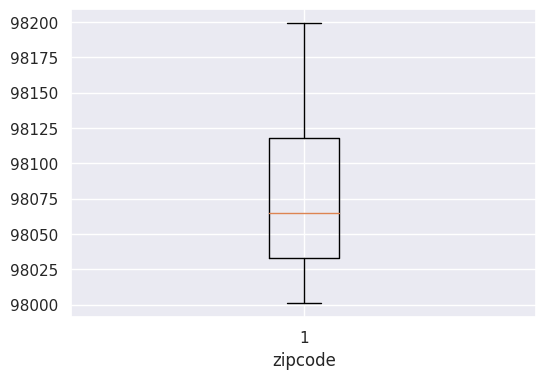

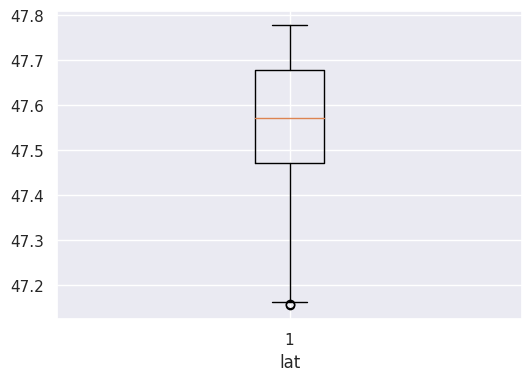

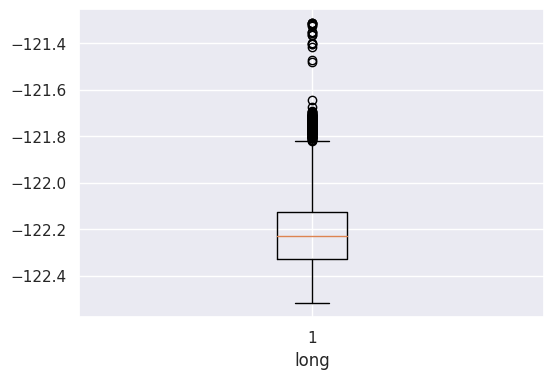

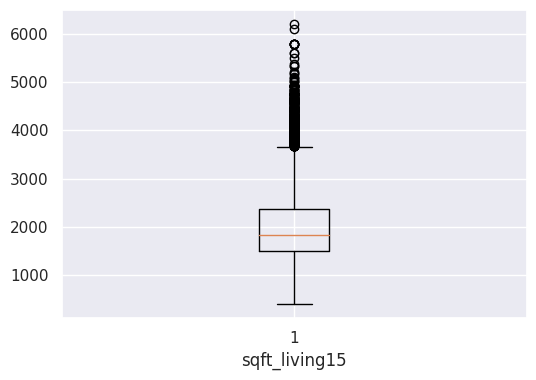

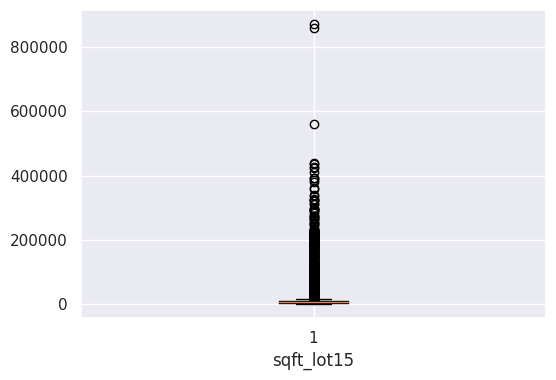

In [59]:
for i in num_cols.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [60]:
print(df.columns.get_loc('waterfront'))
print(df.columns.get_loc('view'))
print(df.columns.get_loc('yr_renovated'))

8
9
15


In [61]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [62]:
for i in num_cols.columns:
  if df.columns.get_loc(i) == 8:
    pass
  elif df.columns.get_loc(i) == 9:
    pass
  elif df.columns.get_loc(i) == 15:
    pass
  else:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

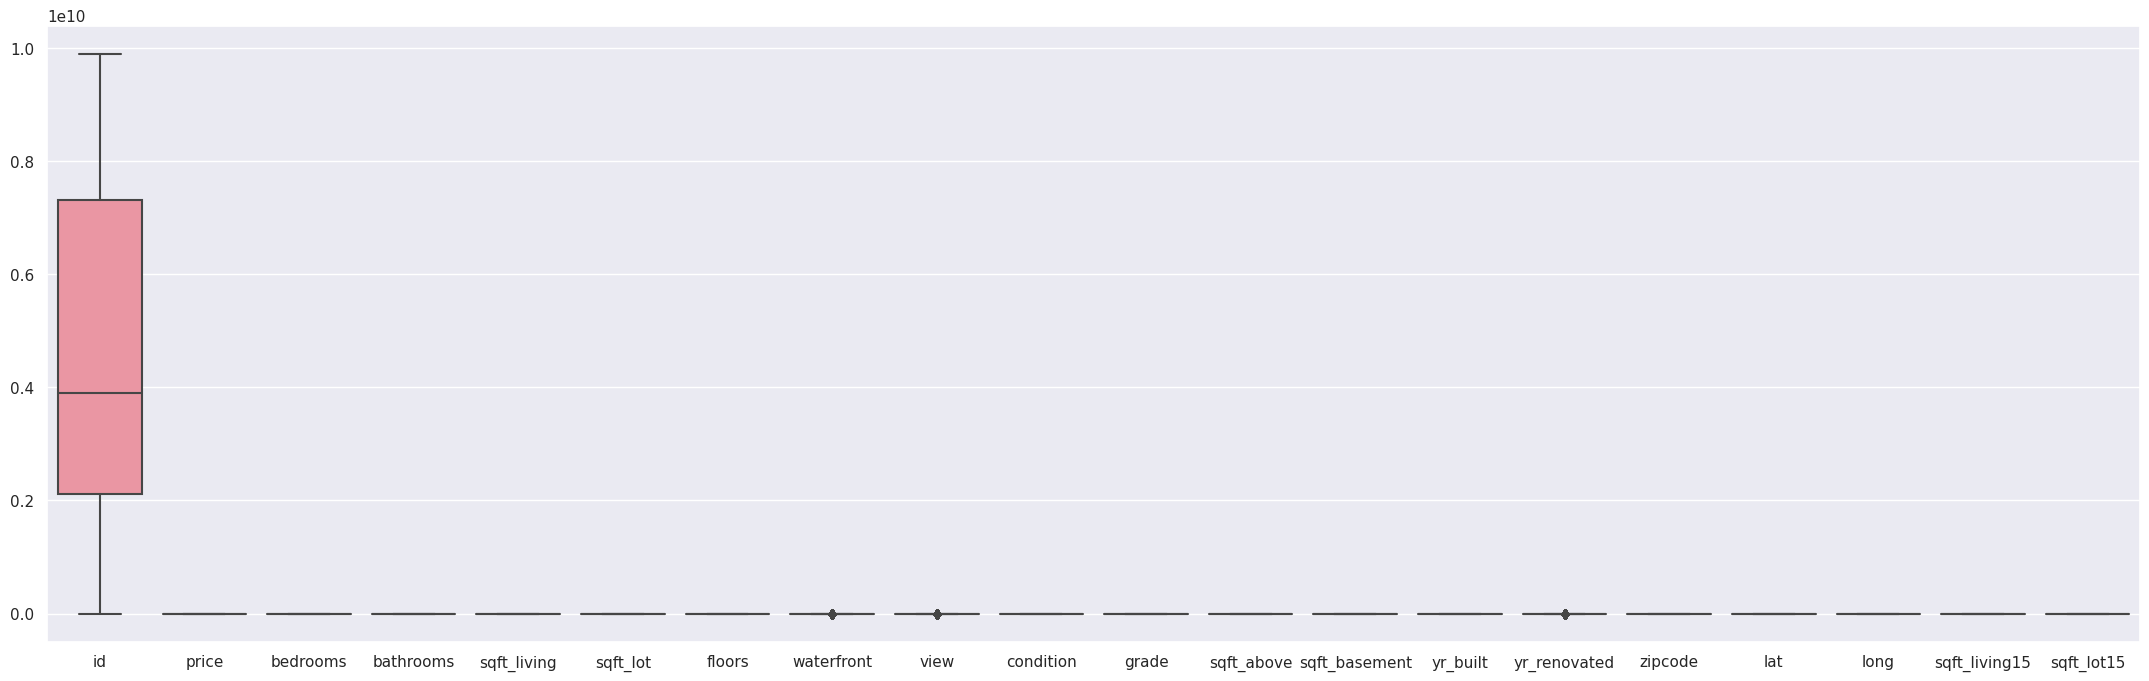

In [63]:
num_cols = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(27,8))
sns.boxplot(num_cols)
plt.show()

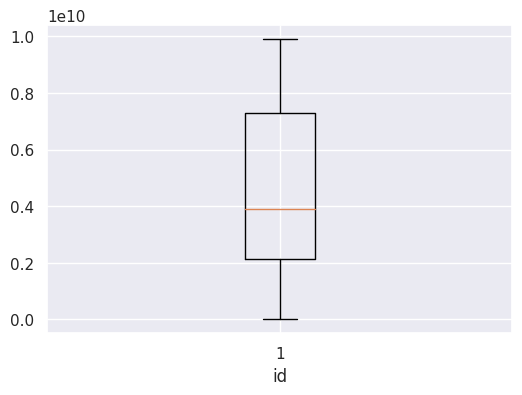

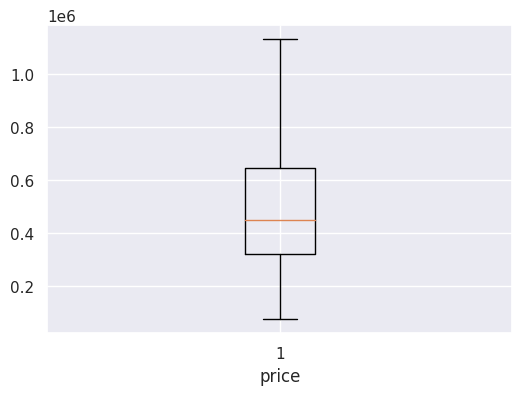

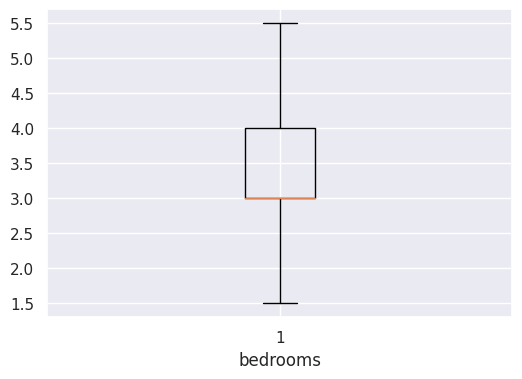

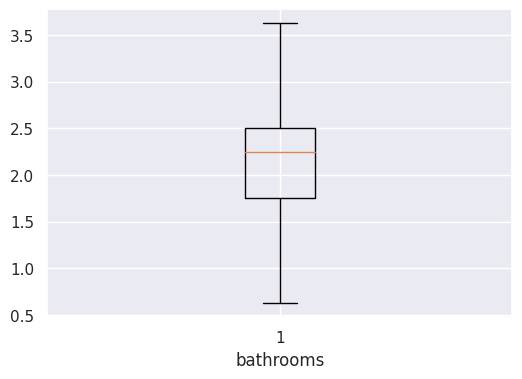

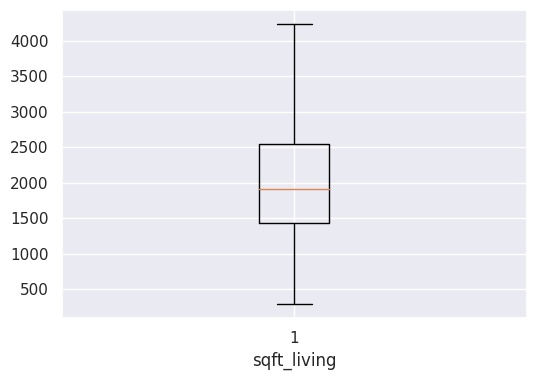

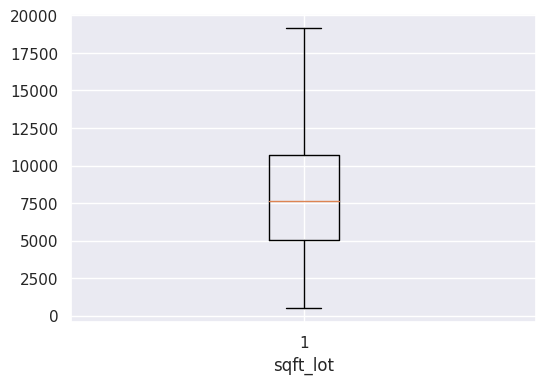

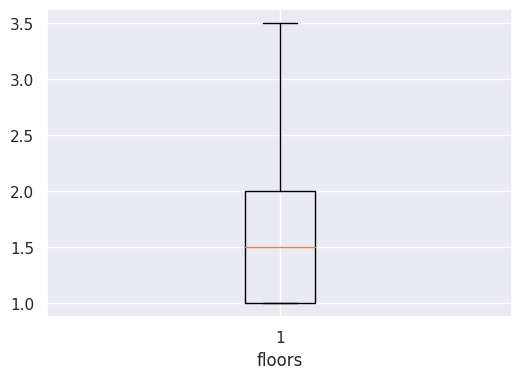

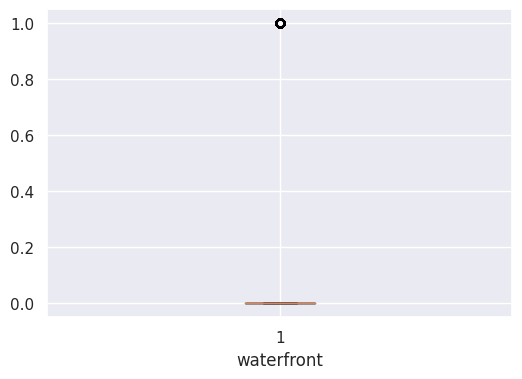

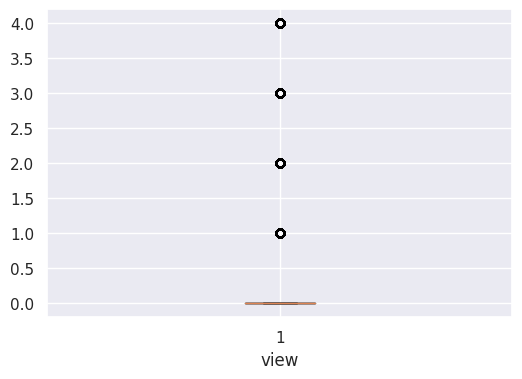

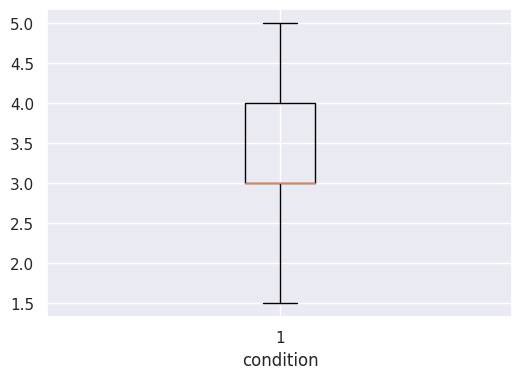

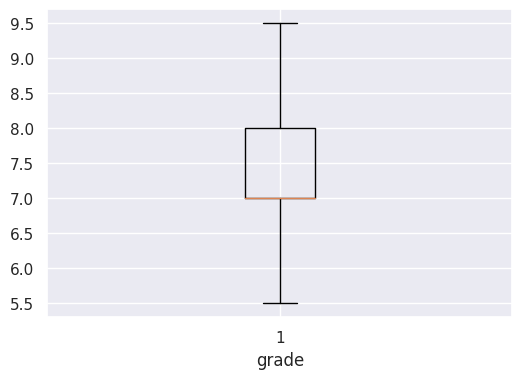

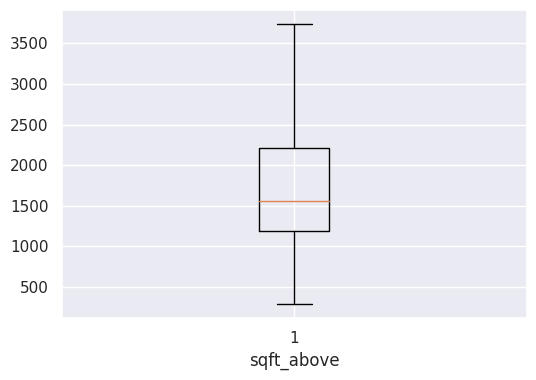

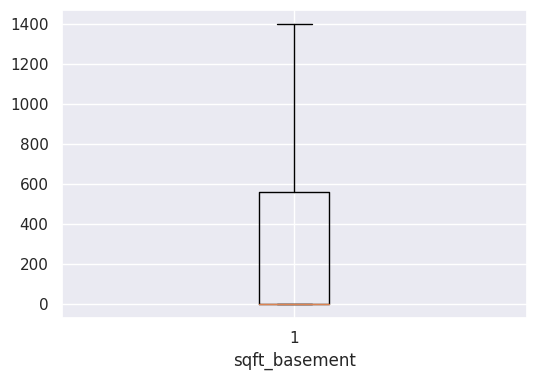

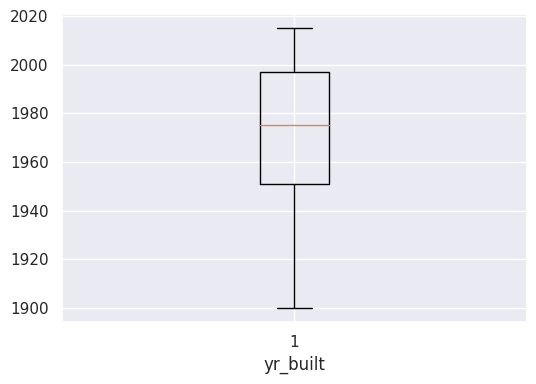

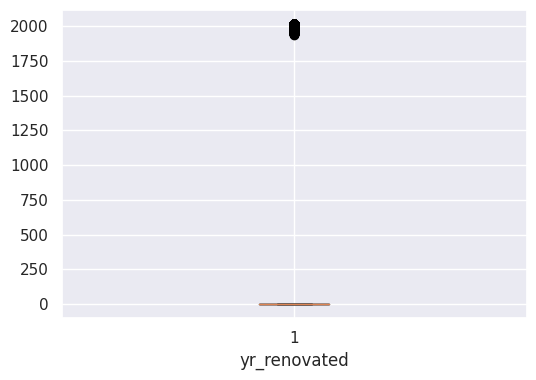

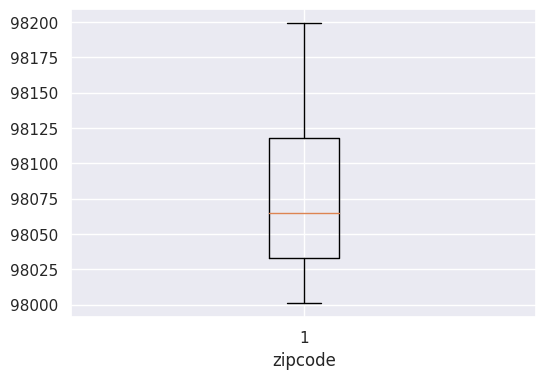

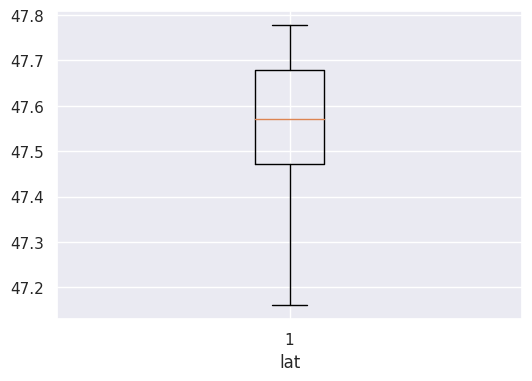

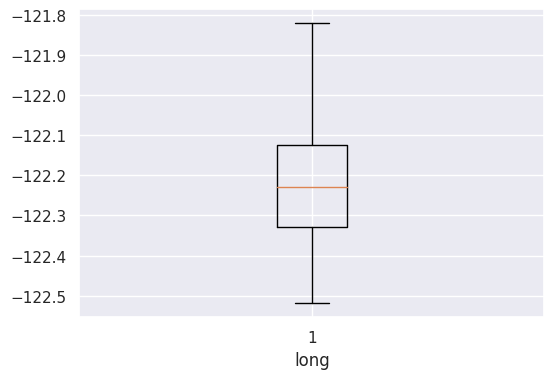

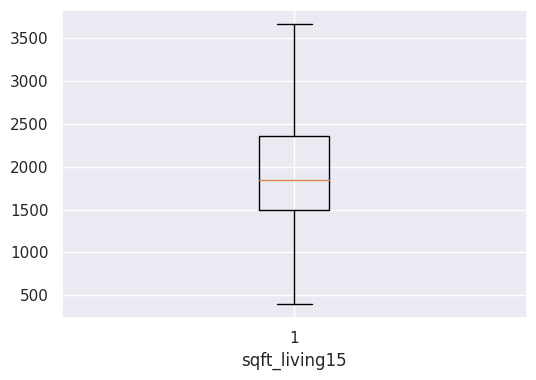

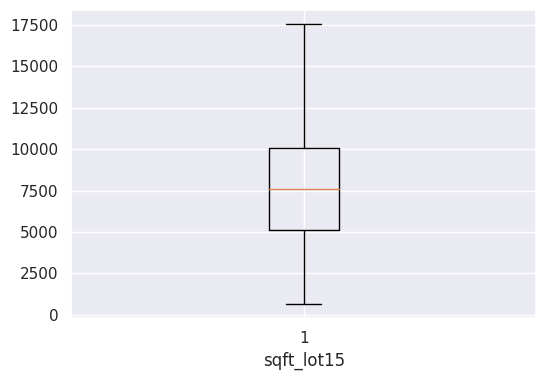

In [64]:
for i in num_cols.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

#### **Bivariate Analysis**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  float64
 11  grade          21613 non-null  float64
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  float64
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  float64
 17  lat            21613 non-null  float64
 18  long  

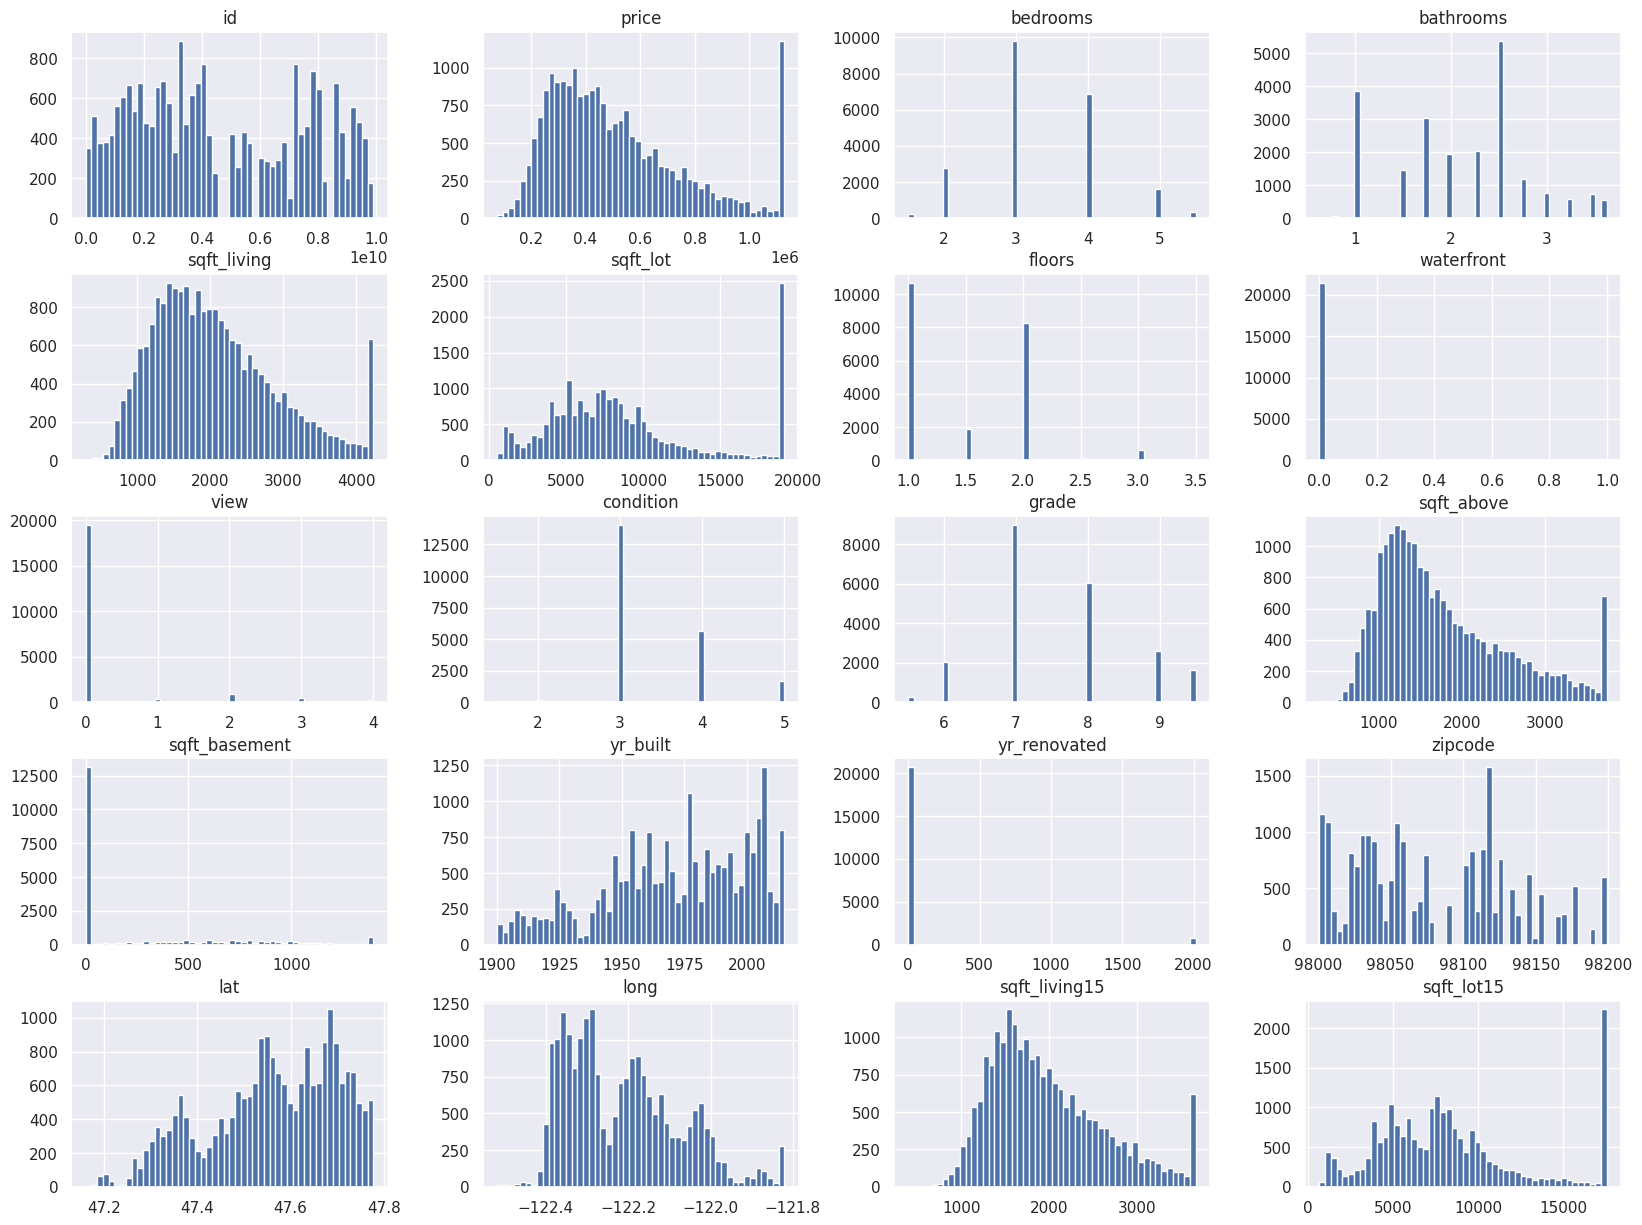

In [66]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

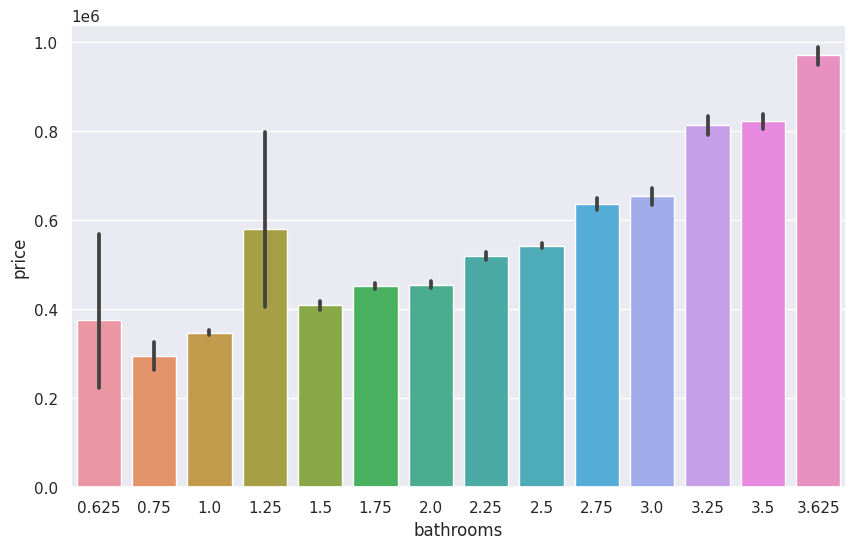

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = 'bathrooms', y = 'price');
plt.show()

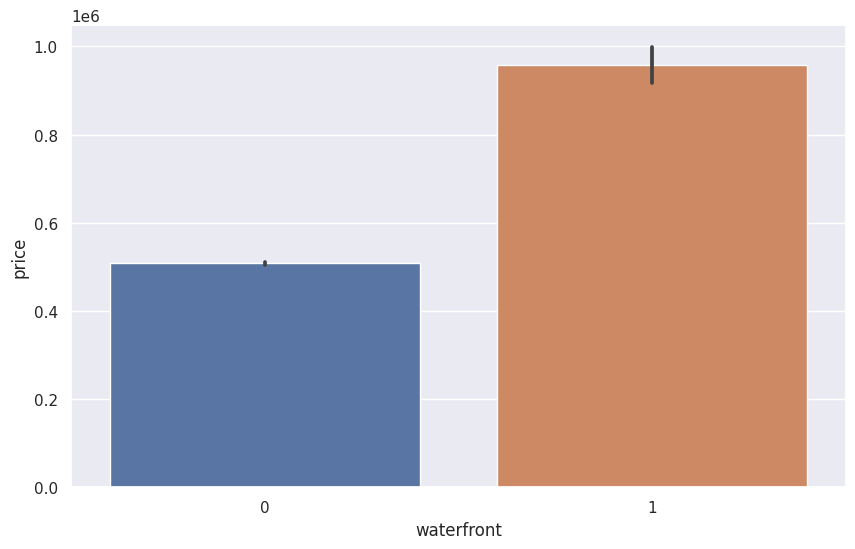

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = 'waterfront', y = 'price');
plt.show()

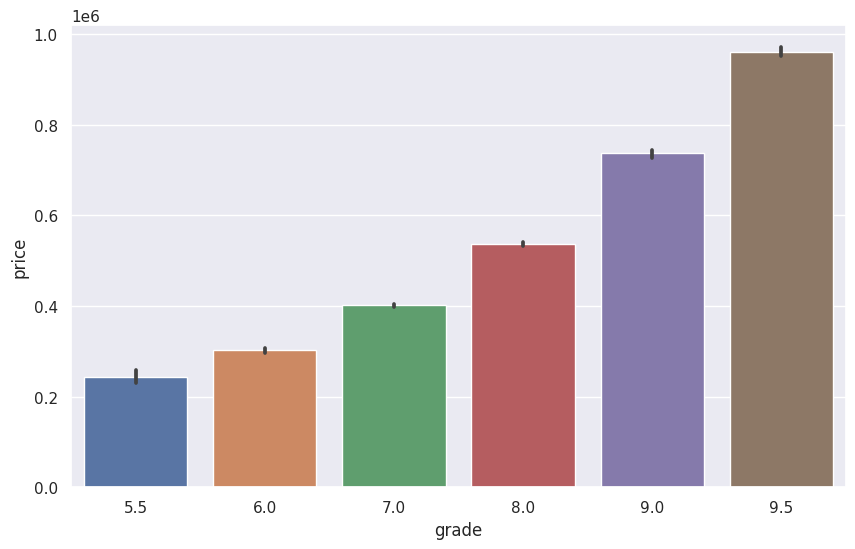

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = 'grade', y = 'price');
plt.show()

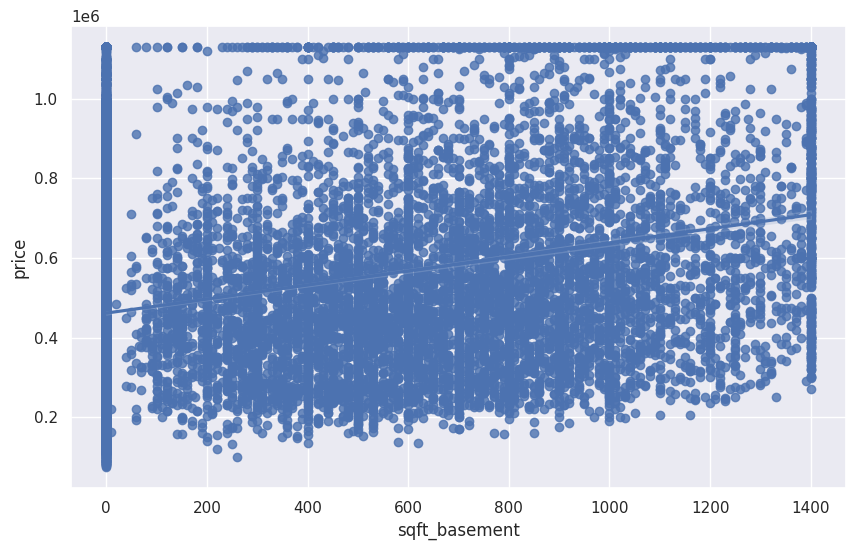

In [70]:
plt.figure(figsize=(10,6))
sns.regplot(x="sqft_basement", y="price", data=df)
plt.show()

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


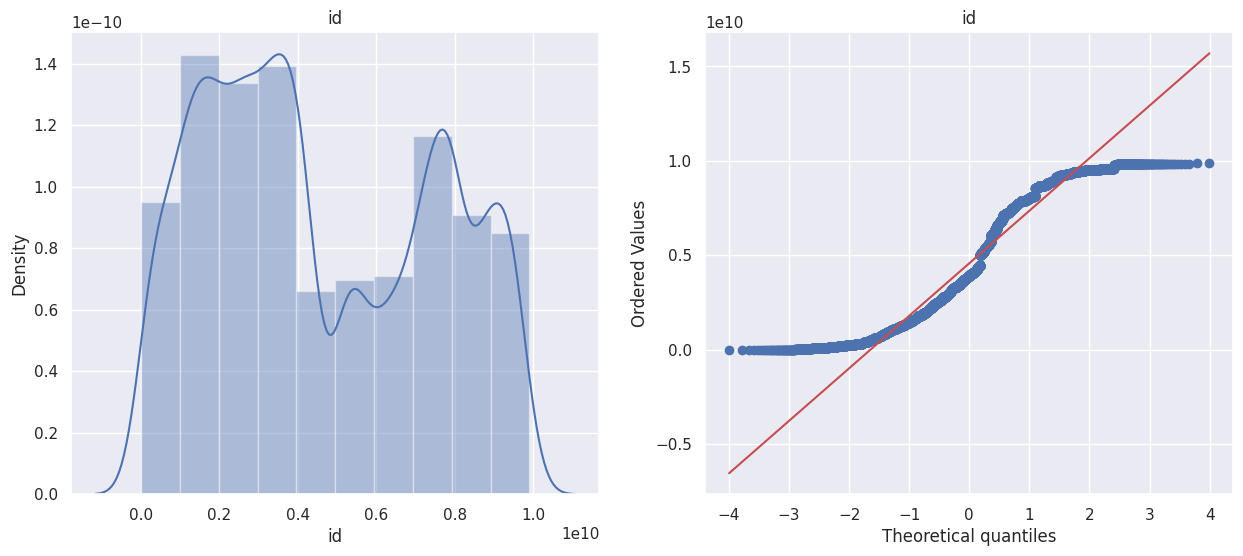

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


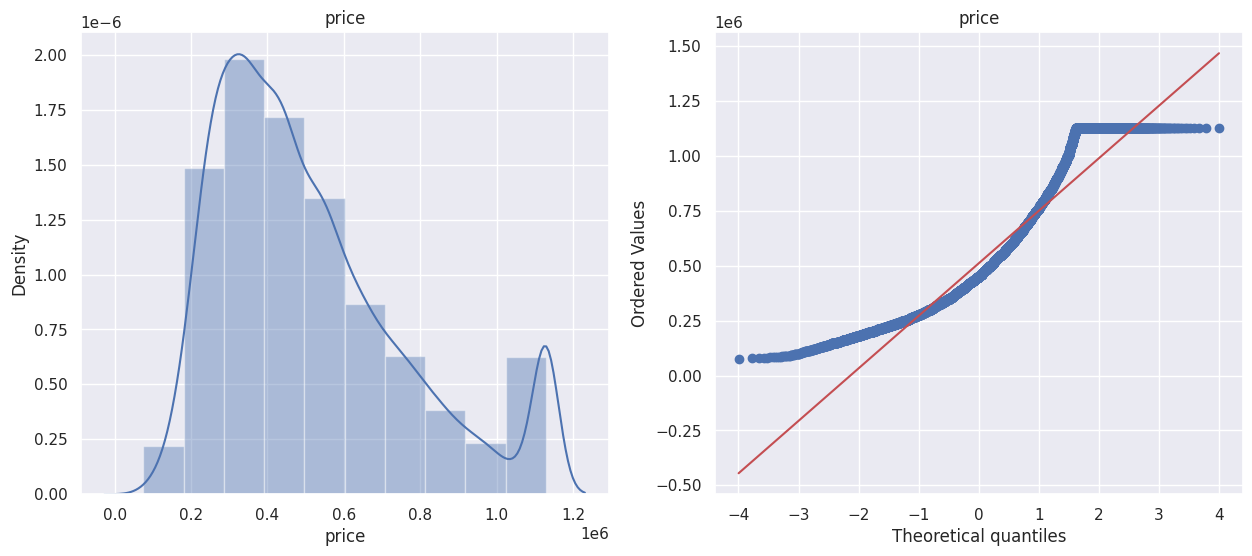

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


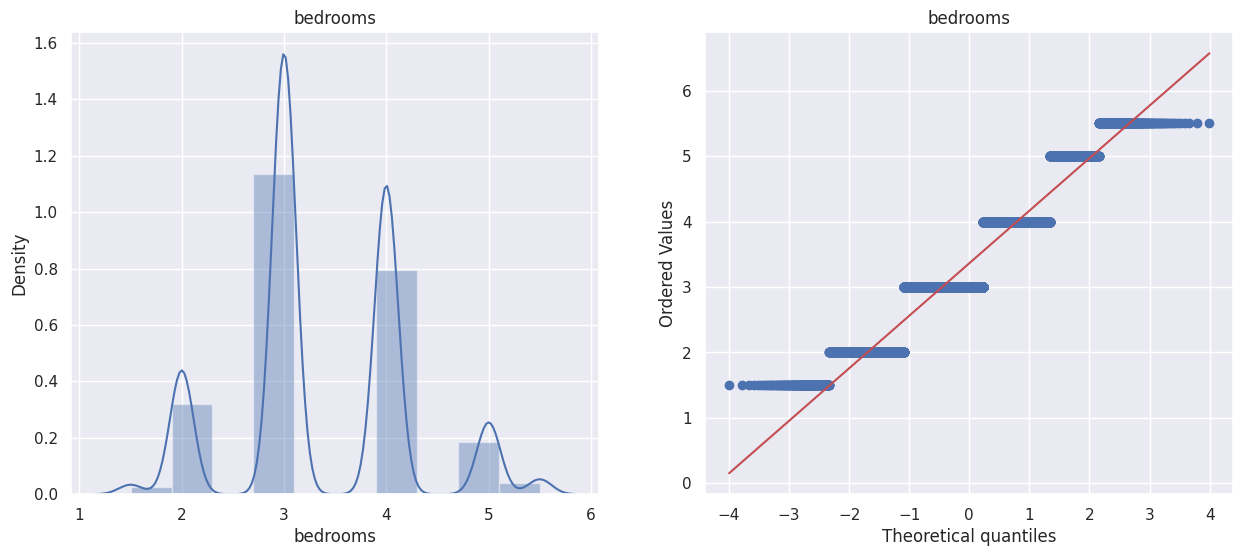

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


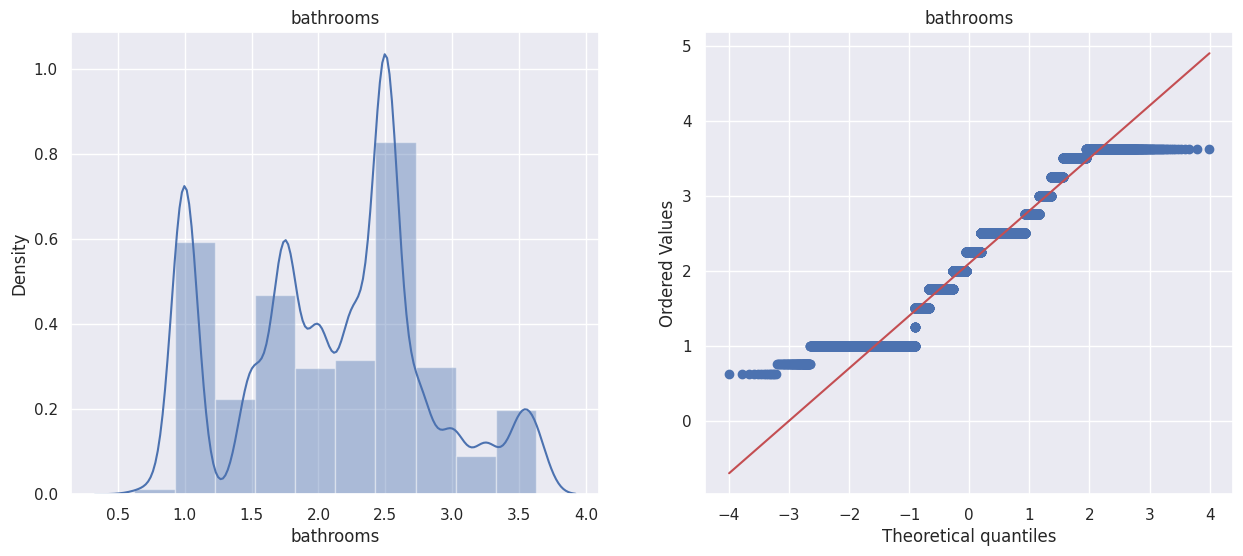

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


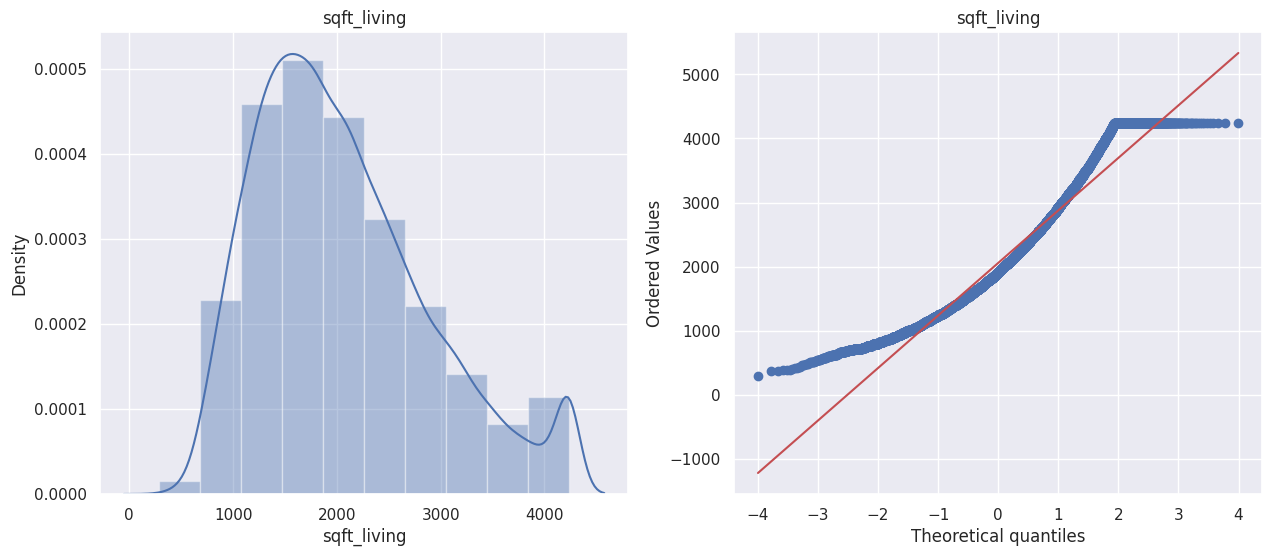

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


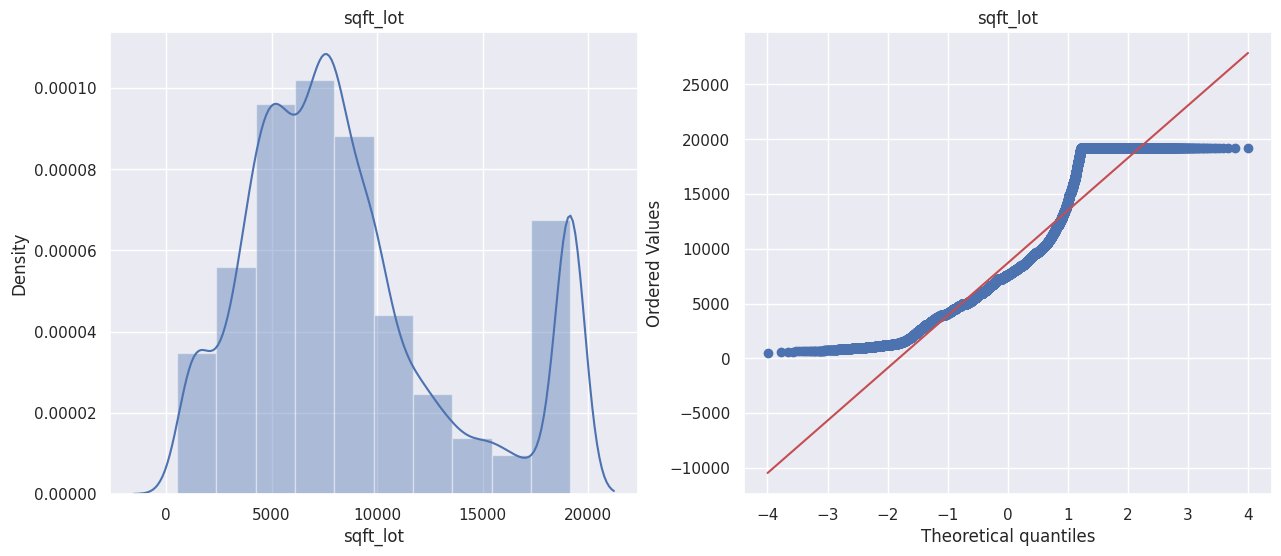

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


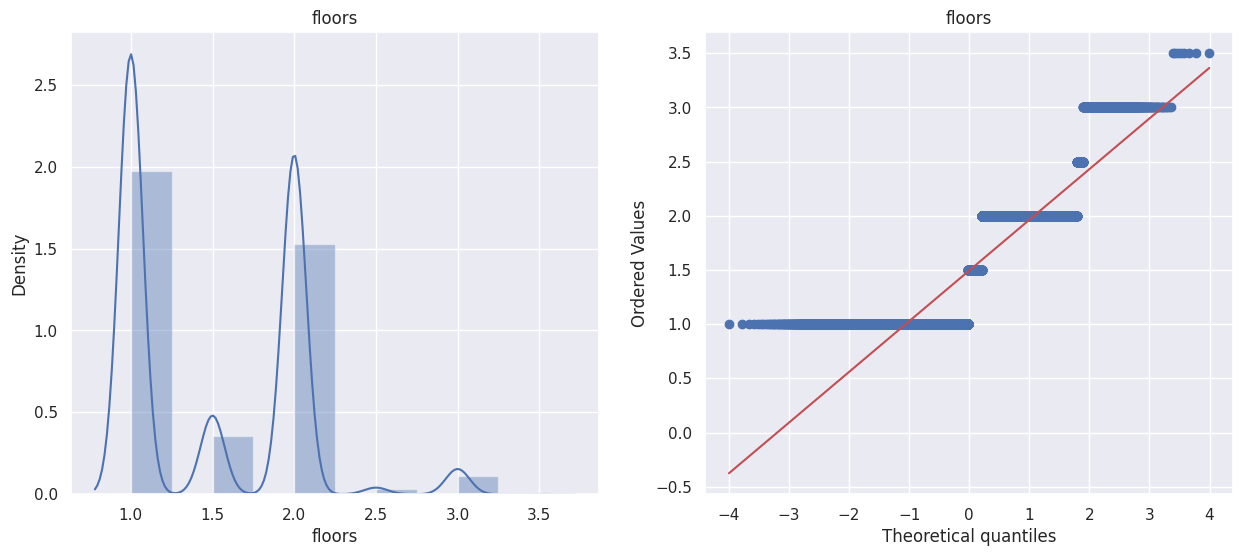

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


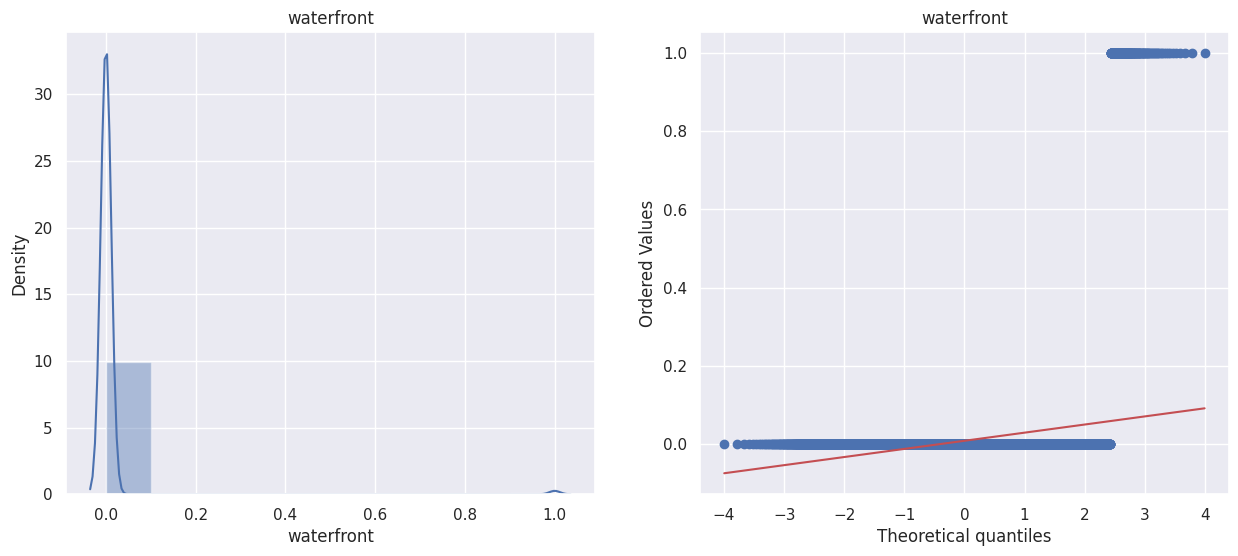

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


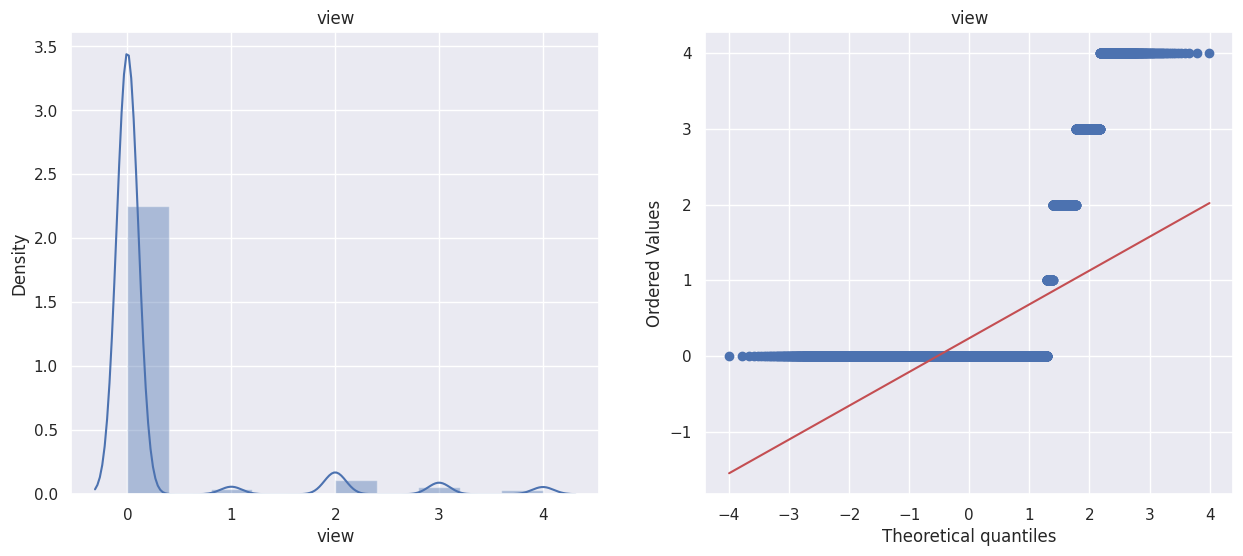

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


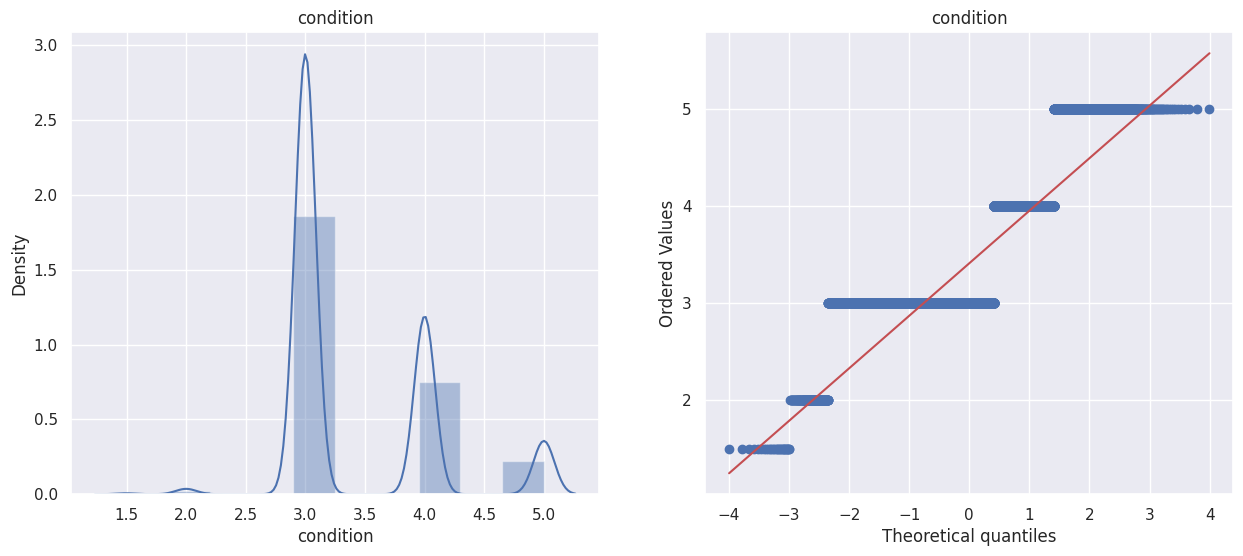

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


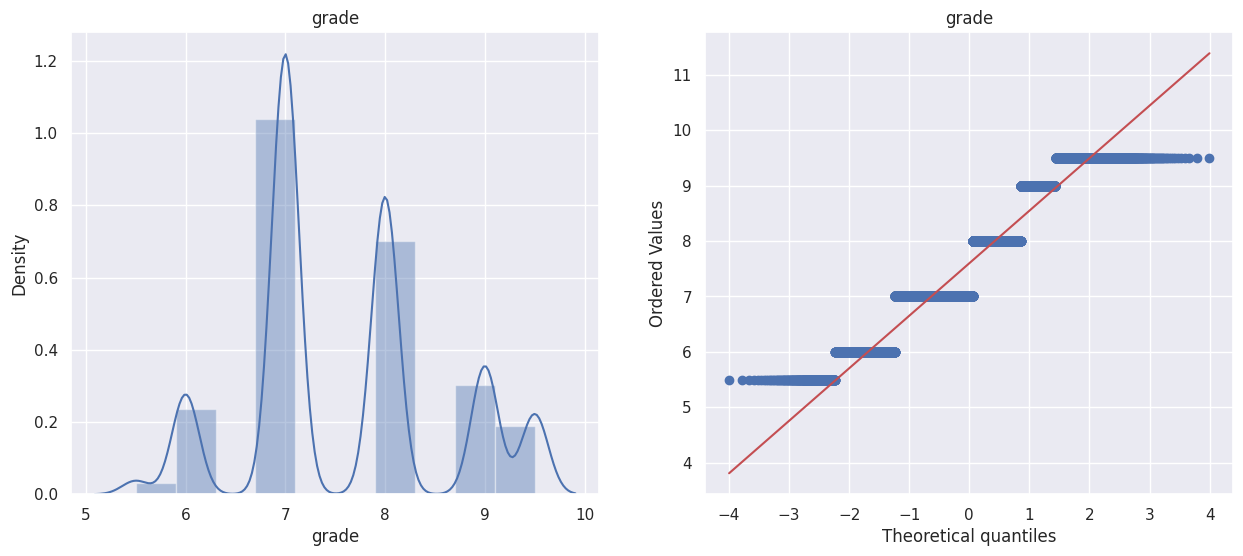

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


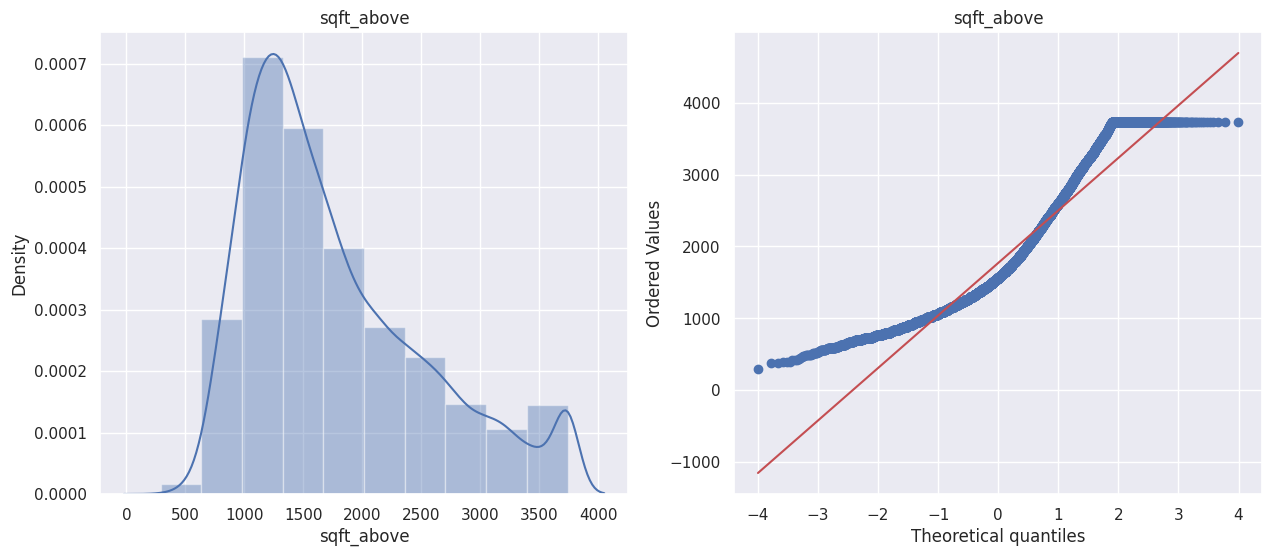

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


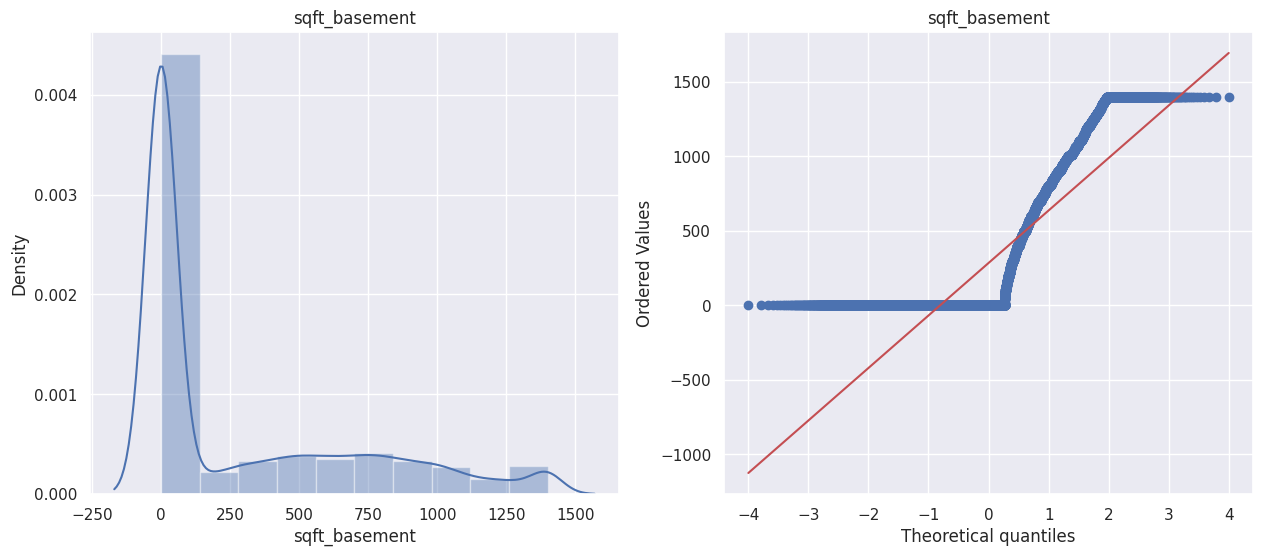

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


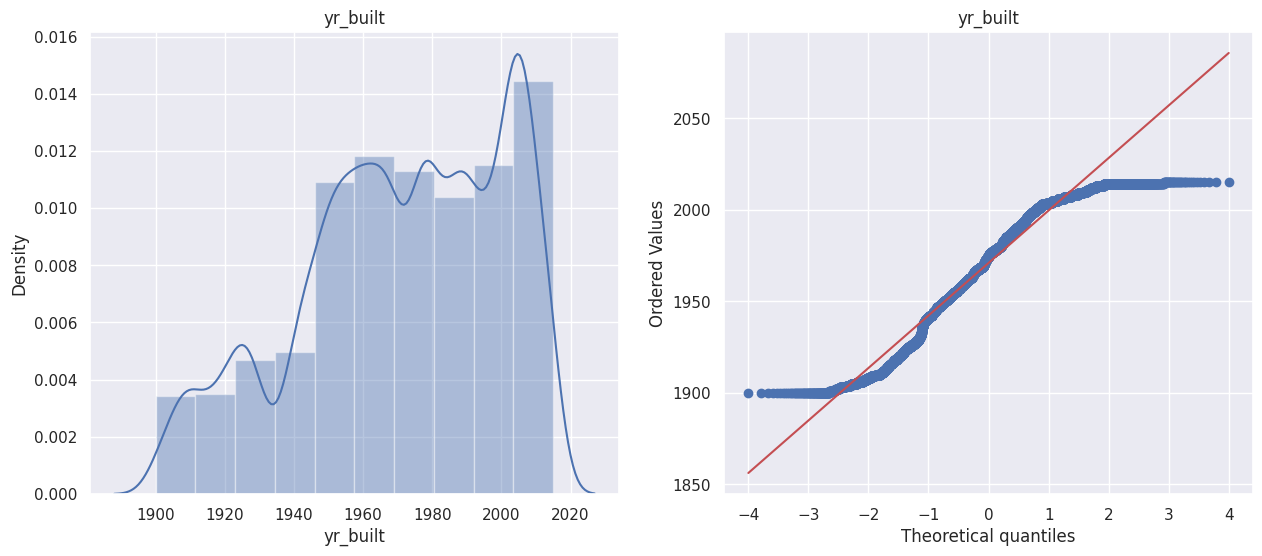

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


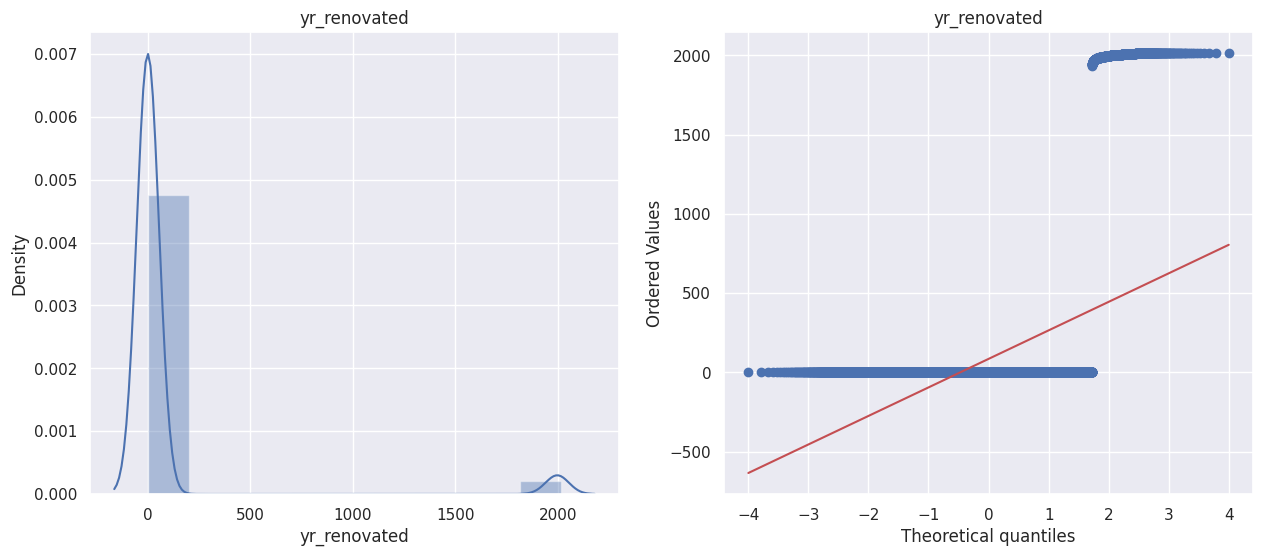

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


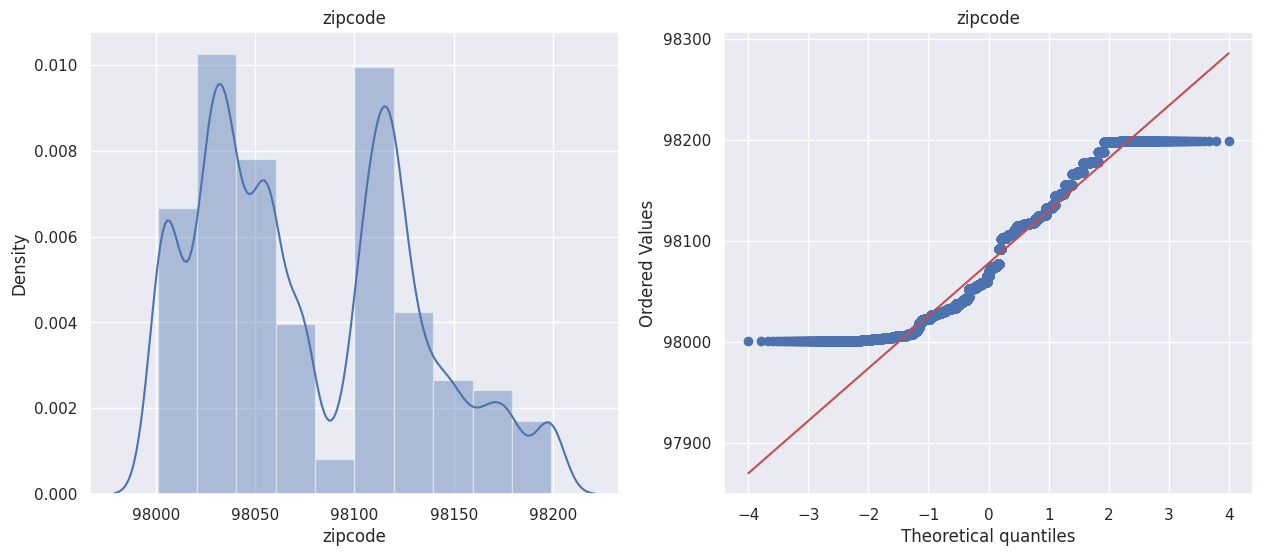

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


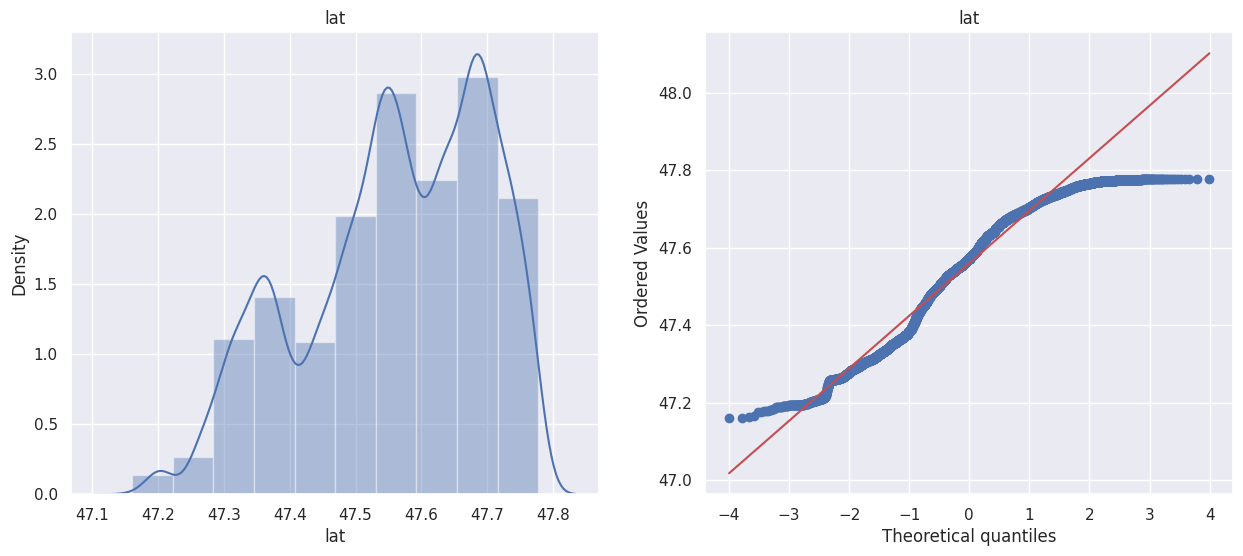

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


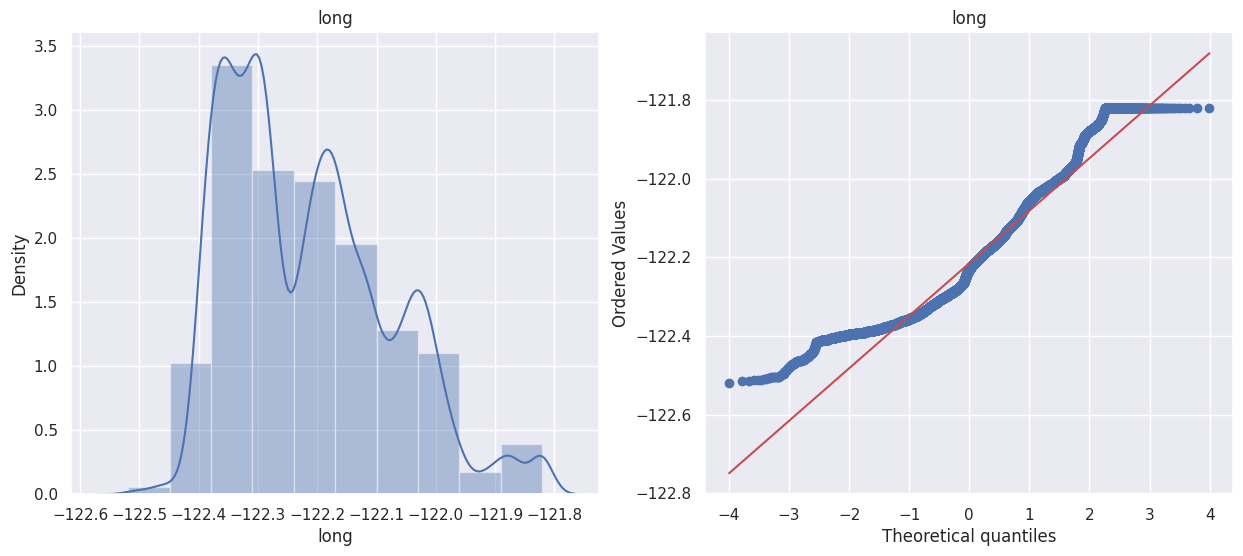

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


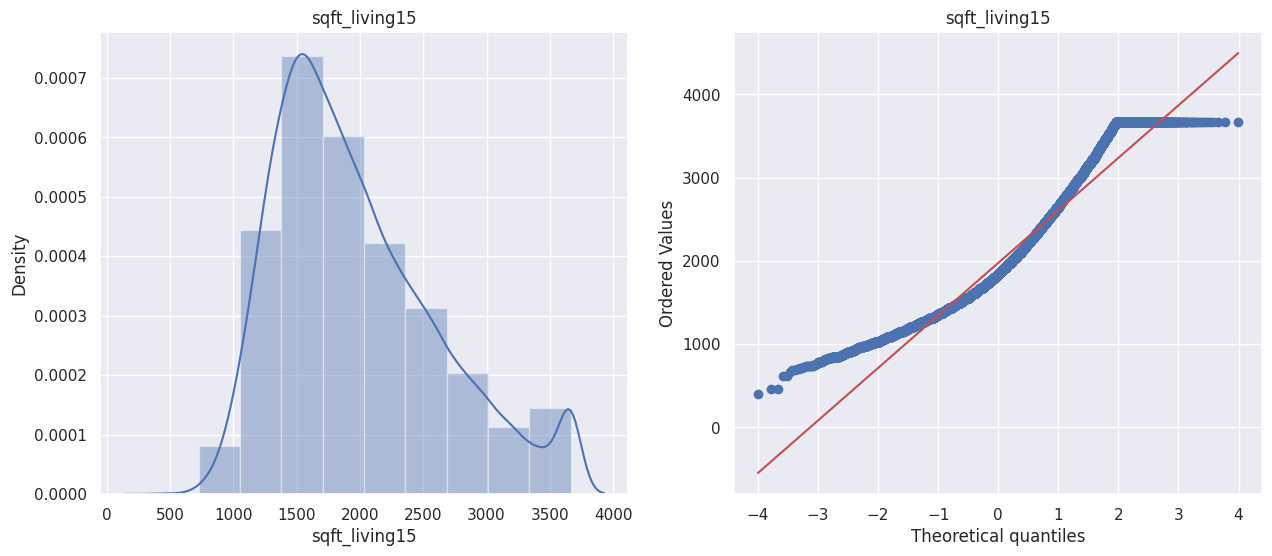

<ipython-input-71-7af58d2ef5aa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


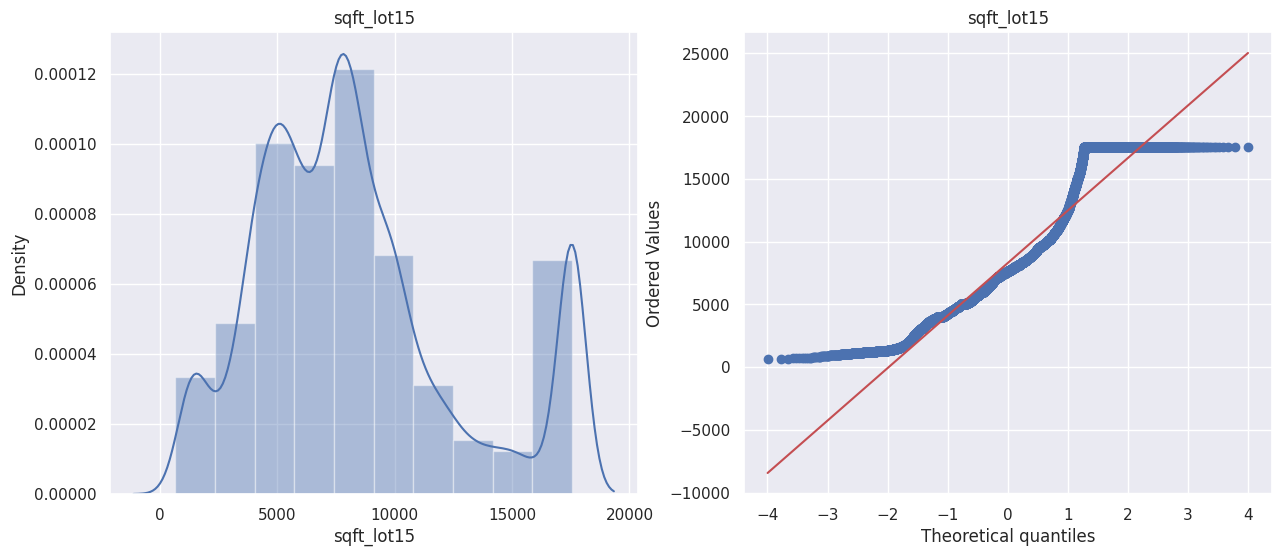

In [71]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

<ipython-input-72-50c0f90b2df7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)


<Axes: >

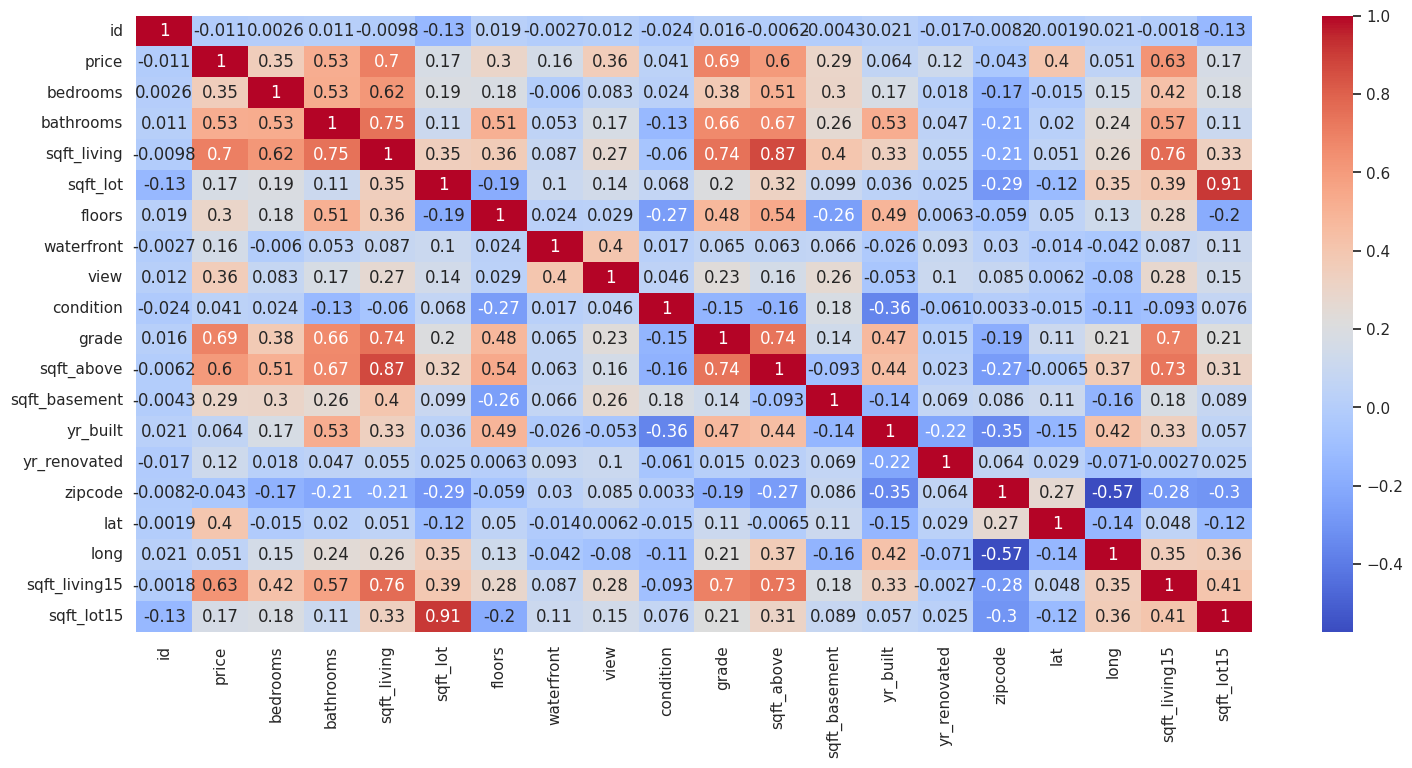

In [72]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

# **Feature Engineering**

#### **Mutual Information**

In [73]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7.129301e+09  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6.414100e+09  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5.631500e+09  20150225T000000  180000.0       2.0       1.00        770.0   
3  2.487201e+09  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1.954401e+09  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...    7.0      1180.0            0.0   
1    7242.0     2.0           0     0  ...    7.0      2170.0          400.0   
2   10000.0     1.0           0     0  ...    6.0       770.0            0.0   
3    5000.0     1.0           0     0  ...    7.0      1050.0          910.0   
4    8080.0     1.0           0     0  ...    8.0      1680.0            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0    1955.0             0  98178.0  47.5112 -122.257         1340.0   
1    1951.0          1991  98125.0  47.7210 -122.319         1690.0   
2    1933.0             0  98028.0  47.7379 -122.233         2720.0   
3    1965.0             0  98136.0  47.5208 -122.393         1360.0   
4    1987.0             0  98074.0  47.6168 -122.045         1800.0   

   sqft_lot15  
0      5650.0  
1      7639.0  
2      8062.0  
3      5000.0  
4      7503.0  

[5 rows x 21 columns]

In [74]:
df.shape

(21613, 21)

In [75]:
X = df.iloc[:,3:21]
Y = df["price"]

In [76]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.00       1180.0    5650.0     1.0           0     0   
1       3.0       2.25       2570.0    7242.0     2.0           0     0   
2       2.0       1.00        770.0   10000.0     1.0           0     0   
3       4.0       3.00       1960.0    5000.0     1.0           0     0   
4       3.0       2.00       1680.0    8080.0     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        3.0    7.0      1180.0            0.0    1955.0             0   
1        3.0    7.0      2170.0          400.0    1951.0          1991   
2        3.0    6.0       770.0            0.0    1933.0             0   
3        5.0    7.0      1050.0          910.0    1965.0             0   
4        3.0    8.0      1680.0            0.0    1987.0             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0  98178.0  47.5112 -122.257         1340.0      5650.0  
1  98125.0  47.7210 -122.319         1690.0      7639.0  
2  98028.0  47.7379 -122.233         2720.0      8062.0  
3  98136.0  47.5208 -122.393         1360.0      5000.0  
4  98074.0  47.6168 -122.045         1800.0      7503.0

In [77]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

yr_renovated     0.001760
waterfront       0.012822
view             0.062810
yr_built         0.072538
sqft_basement    0.074133
sqft_lot         0.077336
sqft_lot15       0.087354
long             0.088714
sqft_above       0.238426
sqft_living15    0.273076
zipcode          0.274366
bathrooms        0.301234
bedrooms         0.323326
lat              0.334627
sqft_living      0.348960
condition        0.382165
floors           0.427809
grade            0.578794
dtype: float64

<Axes: >

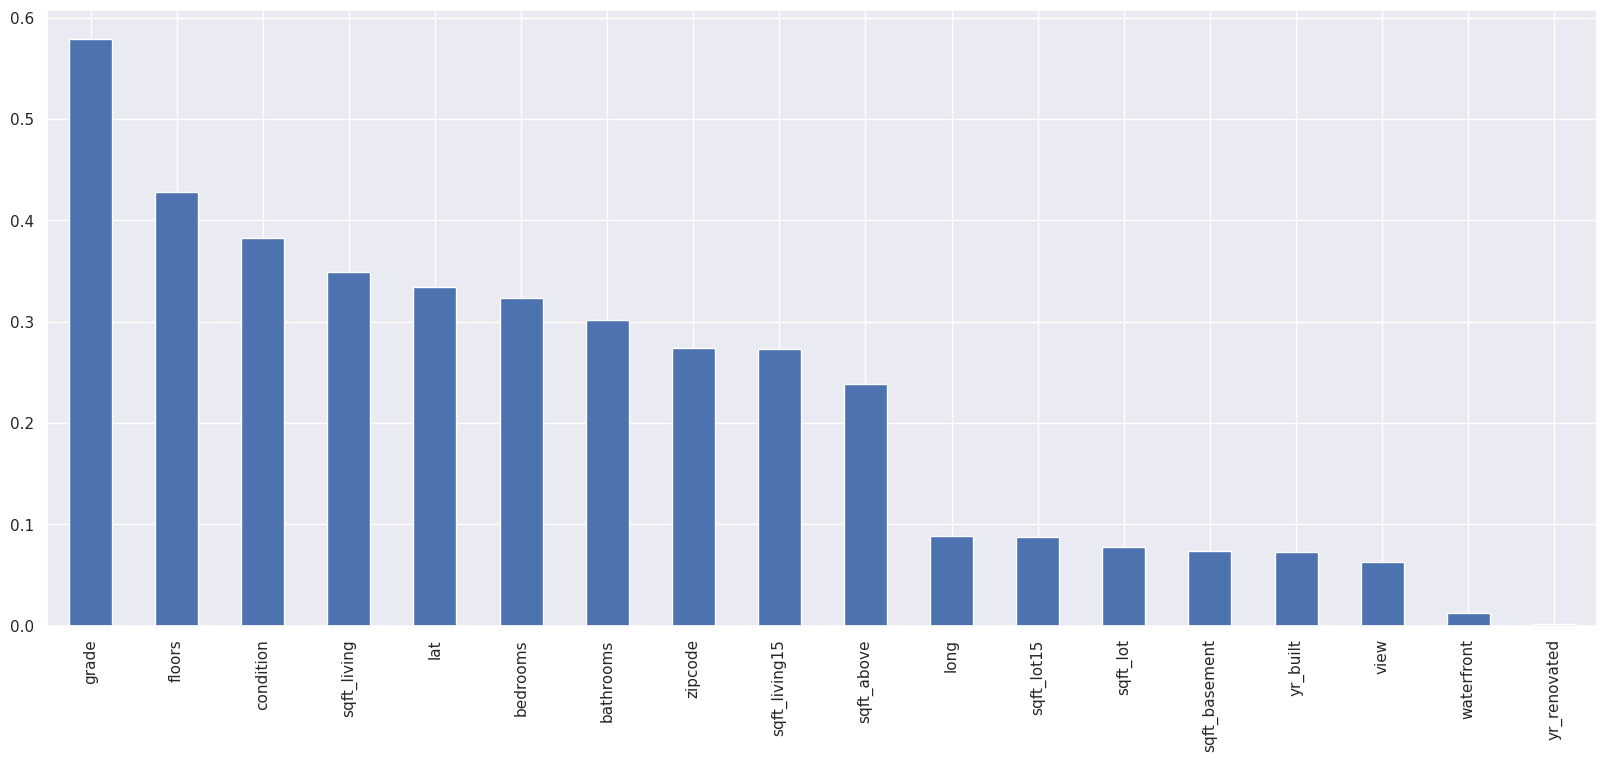

In [78]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### **Create New Feature**

In [79]:
X['Condition_Grade'] = X['condition'] * X['grade']

In [80]:
X['Total_Sqft'] = X['sqft_living'] + X['sqft_lot']
X['Bedroom_Bathroom_Ratio'] = X['bedrooms'] / X['bathrooms']

In [81]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

yr_renovated              0.000531
waterfront                0.008327
view                      0.064764
sqft_lot                  0.069787
sqft_basement             0.070480
yr_built                  0.074688
long                      0.085333
sqft_lot15                0.089442
Total_Sqft                0.122819
Bedroom_Bathroom_Ratio    0.190516
sqft_above                0.239571
sqft_living15             0.273010
zipcode                   0.280550
bedrooms                  0.295818
bathrooms                 0.308981
lat                       0.334039
sqft_living               0.353147
condition                 0.369172
Condition_Grade           0.380777
floors                    0.407095
grade                     0.559257
dtype: float64

<Axes: >

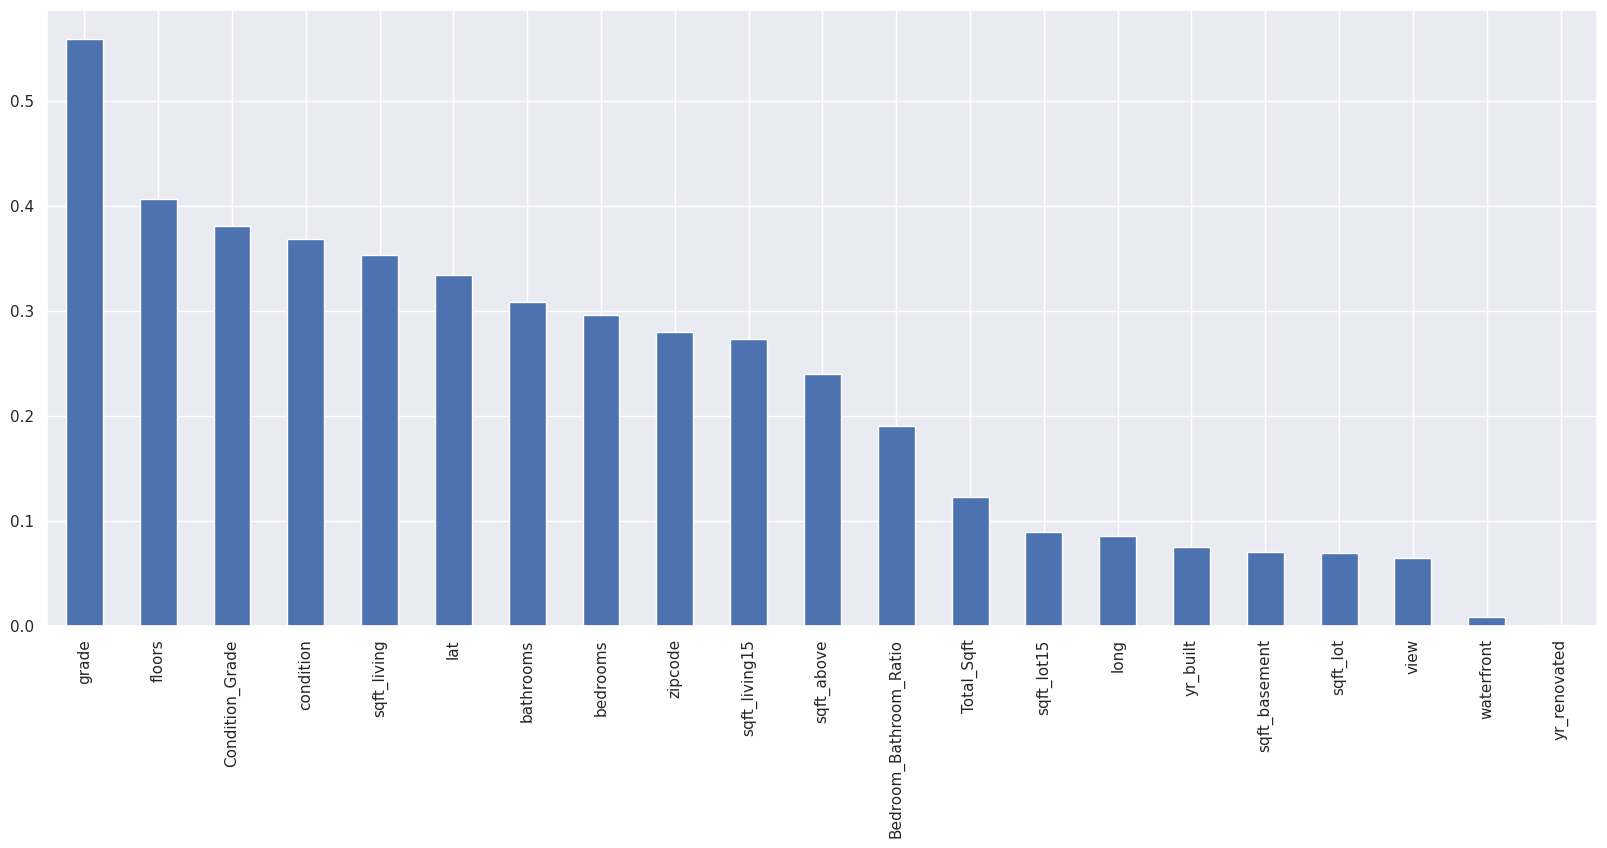

In [82]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### **Splitting Data Into Train and Test**

In [83]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [84]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (17290, 21)
train_label :  (17290,)
test_data :  (4323, 21)
test_label :  (4323,)


#### **Normalizing Data**

In [85]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [86]:
train_data_sc.shape

(17290, 21)

#### **PAC**

In [87]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [88]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [2.93862195e-01 1.42203420e-01 1.08299380e-01 7.41237441e-02
 6.06434598e-02 5.10252427e-02 4.91915204e-02 4.58990711e-02
 3.83096574e-02 3.08295340e-02 2.34547336e-02 1.93405428e-02
 1.81839702e-02 1.54852290e-02 1.09149421e-02 9.93680626e-03
 5.68299049e-03 2.07124857e-03 2.84368306e-04 2.57943471e-04
 3.76873241e-33]


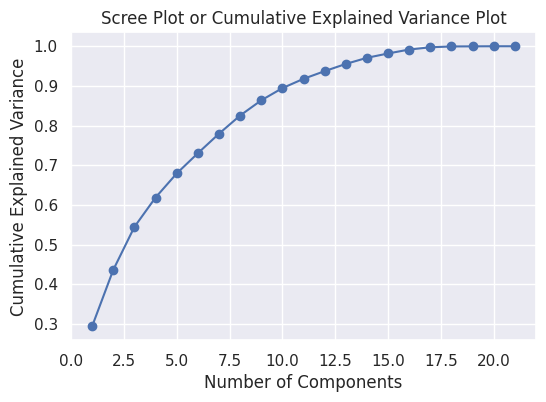

In [89]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [90]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 13


In [91]:
pc = PCA(n_components=13)
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [92]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.2938622  0.14220342 0.10829938 0.07412374 0.06064346 0.05102524
 0.04919152 0.04589907 0.03830966 0.03082953 0.02345473 0.01934054
 0.01818397]


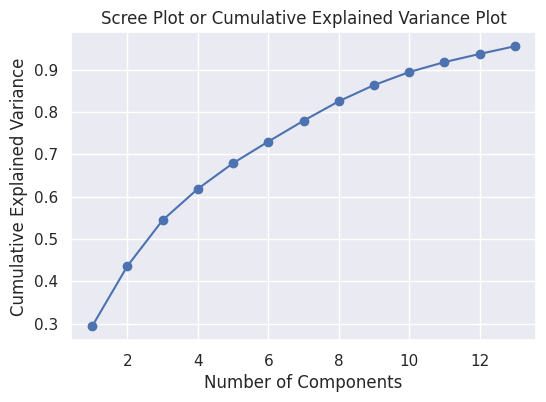

In [93]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [94]:
print("train_data : ",train_data_sc_pc.shape)
print("test_data : ",test_data_sc_pc.shape)

train_data :  (17290, 13)
test_data :  (4323, 13)


# **Model**

#### **Linear Regression**

In [95]:
model_lr = LinearRegression().fit(train_data_sc_pc,train_label)

In [96]:
model_lr.score(train_data_sc_pc,train_label)

0.7434007963670108

In [97]:
y_pred = model_lr.predict(test_data_sc_pc)
y_pred

array([527060.78226952, 901339.25929402, 354690.58144082, ...,
       462094.29455751, 208207.53508996, 369893.78720575])

In [98]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred,test_label))
print("R2_Score : ",r2_score(y_pred,test_label))

Mean Absolute Error :  111353.40011035527
Mean Squared Error :  20856713029.731476
R2_Score :  0.5508835217741791


In [99]:
print(" Train Data Cross_val_score : ",cross_val_score(model_lr,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_lr,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.742533709032861
Test Data Cross_val_score :  0.7467675903839075


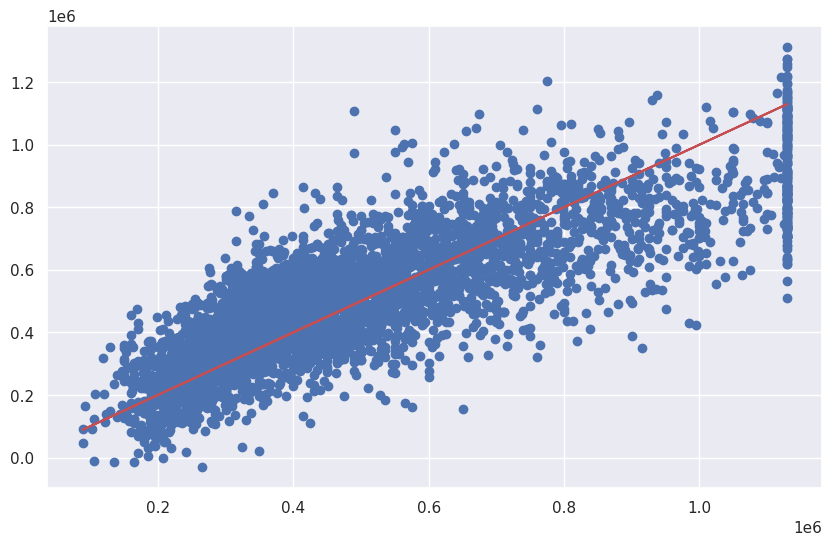

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred)
plt.plot(test_label,test_label,'r')

#### **Random Forest Model**

In [101]:
model_rf = RandomForestRegressor(max_depth= None, n_estimators= 200).fit(train_data_sc_pc,train_label)

In [102]:
model_rf.score(train_data_sc_pc,train_label)

0.9762022744187728

In [103]:
y_pred_2 = model_rf.predict(test_data_sc_pc)

In [104]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_2,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_2,test_label))
print("R2_Score : ",r2_score(y_pred_2,test_label))

Mean Absolute Error :  100096.67358765774
Mean Squared Error :  19273397271.810787
R2_Score :  0.5621627117786683


In [105]:
print(" Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean())

 Train Data Cross_val_score :  0.8302046213553975


In [106]:
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean())

Test Data Cross_val_score :  0.8077909587294834


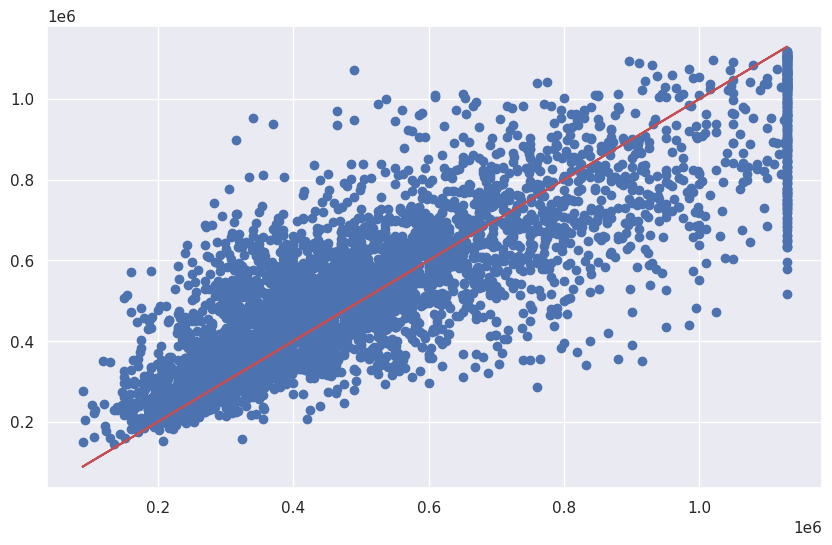

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'r')

#### **Decision Tree Model**

In [110]:
model_tree = DecisionTreeRegressor()

In [111]:
model_tree.fit(train_data_sc_pc,train_label)

DecisionTreeRegressor()

In [112]:
model_tree.score(train_data_sc_pc,train_label)

0.9983633900564418

In [113]:
y_pred_3 = model_tree.predict(test_data_sc_pc)

In [114]:
print("Mean Absolute Error : ",mean_absolute_error(y_pred_3,test_label))
print("Mean Squared Error : ",mean_squared_error(y_pred_3,test_label))
print("R2_Score : ",r2_score(y_pred_3,test_label))

Mean Absolute Error :  129393.4878556558
Mean Squared Error :  34632207260.2142
R2_Score :  0.43552940544555496


In [115]:
print(" Train Data Cross_val_score : ",cross_val_score(model_tree,train_data_sc_pc,train_label,cv=5).mean())

 Train Data Cross_val_score :  0.6429847045847629


In [116]:
print("Test Data Cross_val_score : ",cross_val_score(model_tree,test_data_sc_pc,test_label,cv=5).mean())

Test Data Cross_val_score :  0.5875269845920917


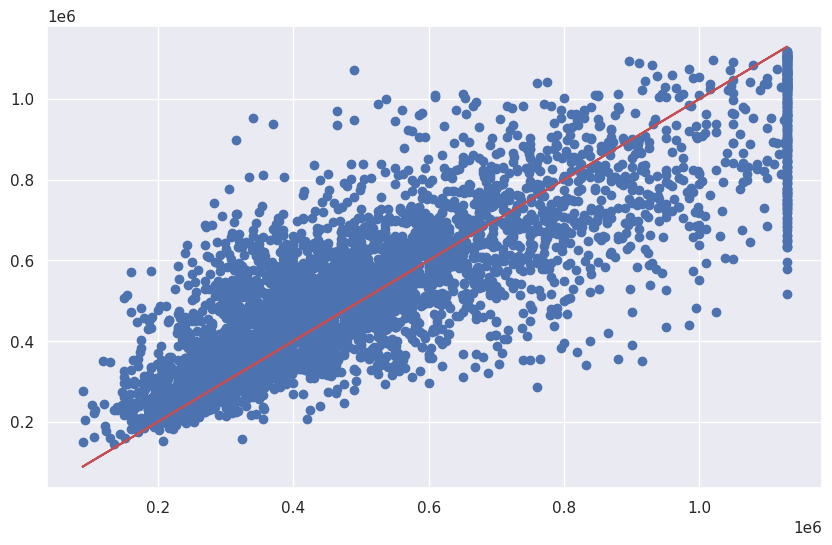

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(test_label,y_pred_2)
plt.plot(test_label,test_label,'r')